In [1]:
# Update PATH to allow imports
ROOT = "/data/MEAprojects/DLSpikeSorter"
import sys
sys.path.append(ROOT)

In [2]:
# Imports
from pathlib import Path
ROOT = Path(ROOT)

%load_ext autoreload
%autoreload 2
from src.data import RecordingCrossVal
from src.model import ModelSpikeSorter

In [ ]:
model = ModelSpikeSorter.load(ROOT / "/data/MEAprojects/DLSpikeSorter/models/v0_3/2954")

In [5]:
# Get recording
# Get the recording data
rec_cross_val = RecordingCrossVal(
    sample_size=model.sample_size, front_buffer=model.buffer_front_sample, end_buffer=model.buffer_end_sample,
    num_wfs_probs=[1], isi_wf_min=5, isi_wf_max=None,
    thresh_amp=5, thresh_std=0.6,
    samples_per_waveform=2, data_root=ROOT,
    mmap_mode="r", device="cuda", as_datasets=False,
)
rec, train, val = rec_cross_val["2954"]
print(f"Val Recording: {rec} - Train: {len(train.dataset)} samples - Val: {len(val.dataset)} - Val/Train: {len(val.dataset)/len(train.dataset) * 100:.1f}%")

Val Recording: 2954 - Train: 338 samples - Val: 74 - Train/Val: 21.9%


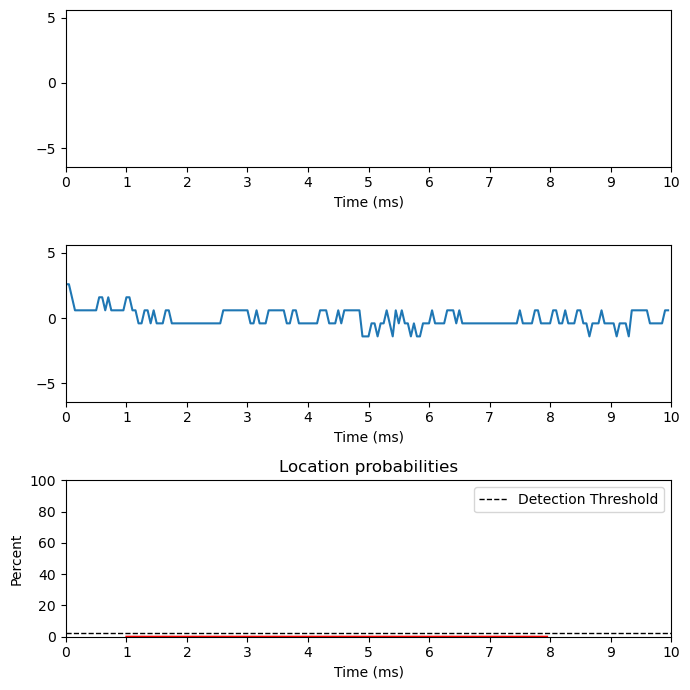

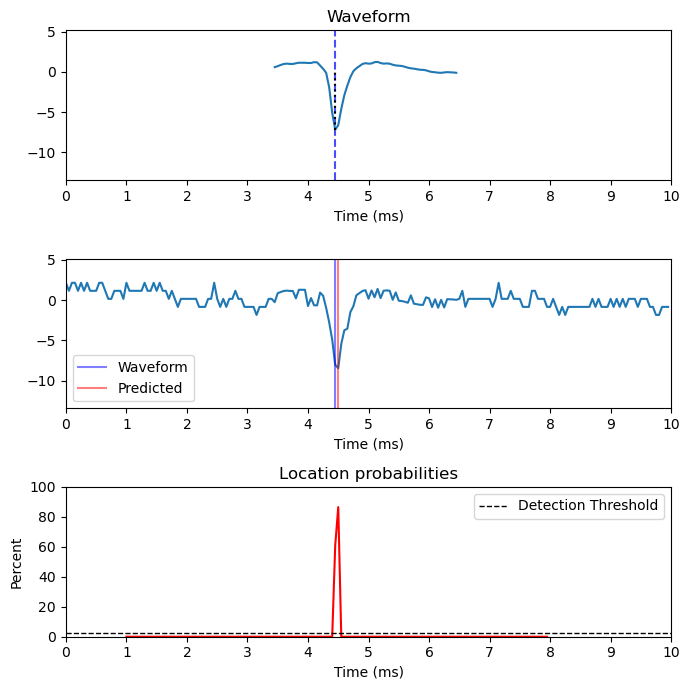

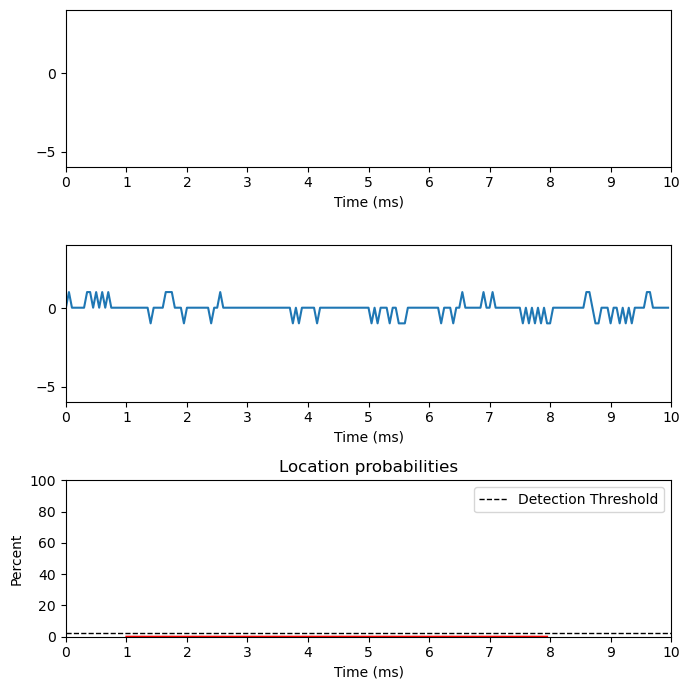

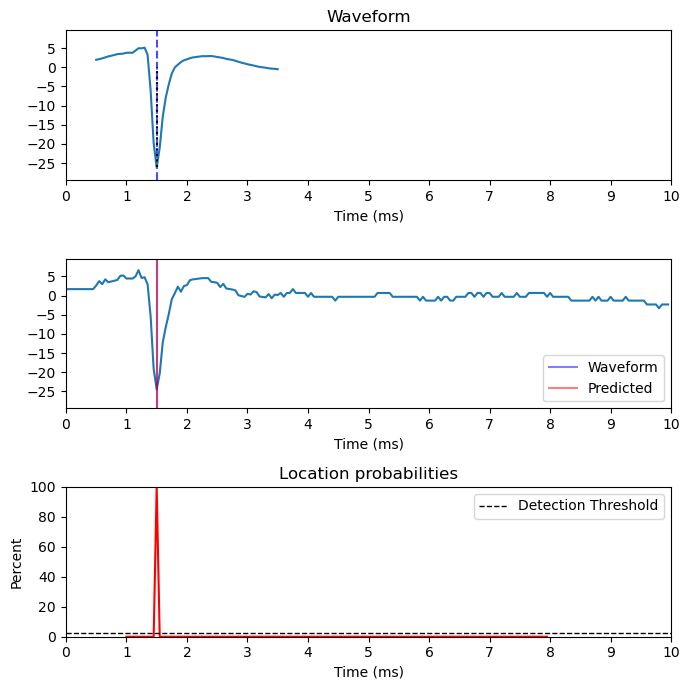

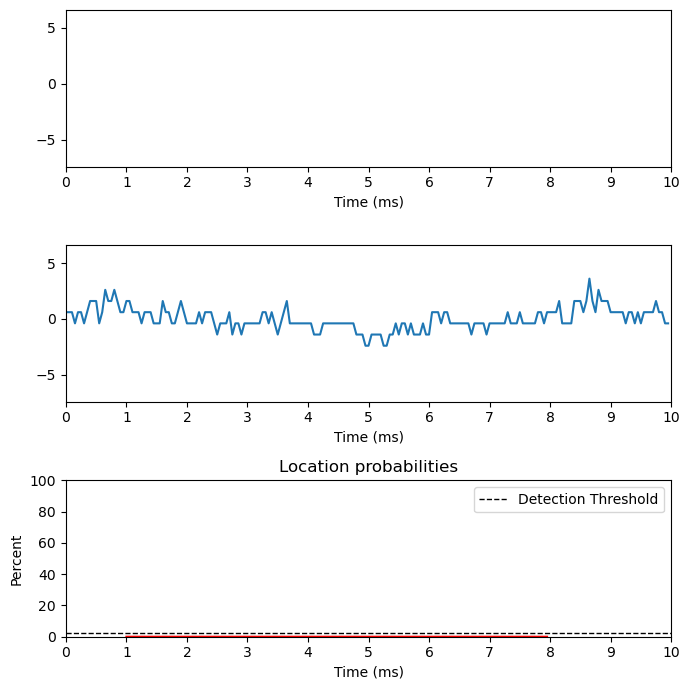

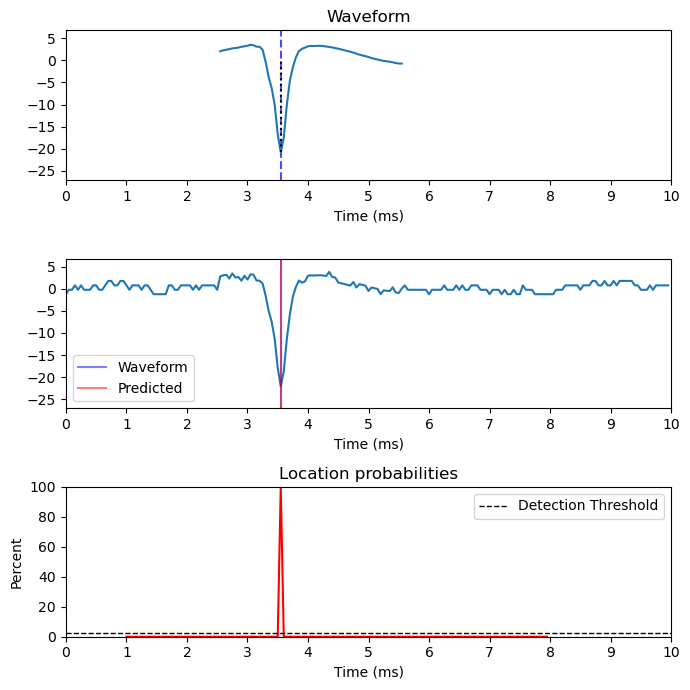

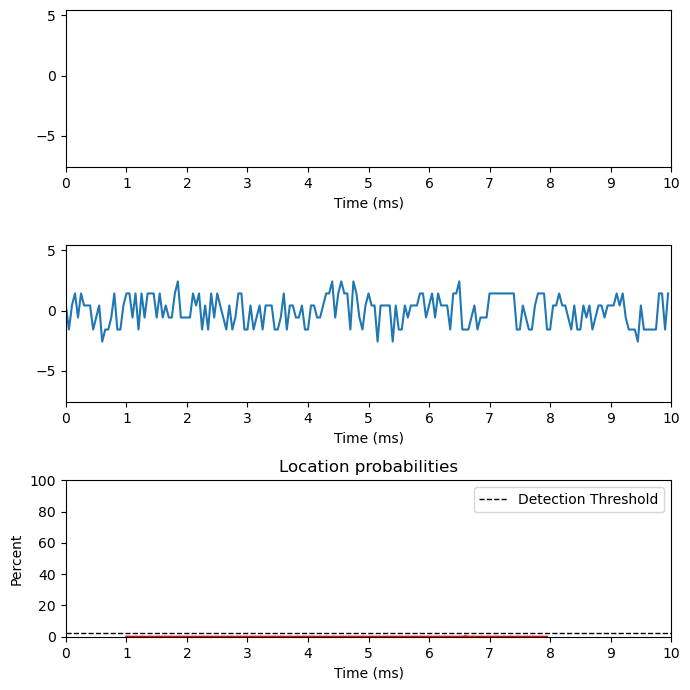

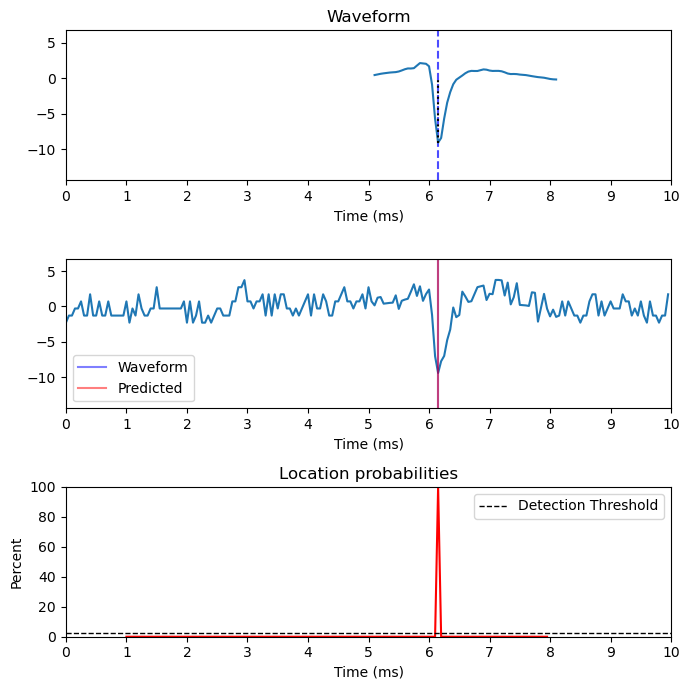

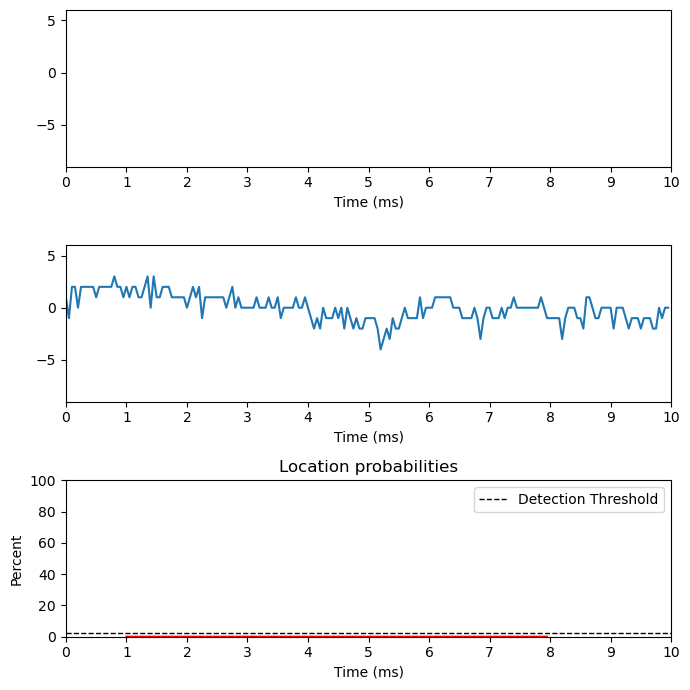

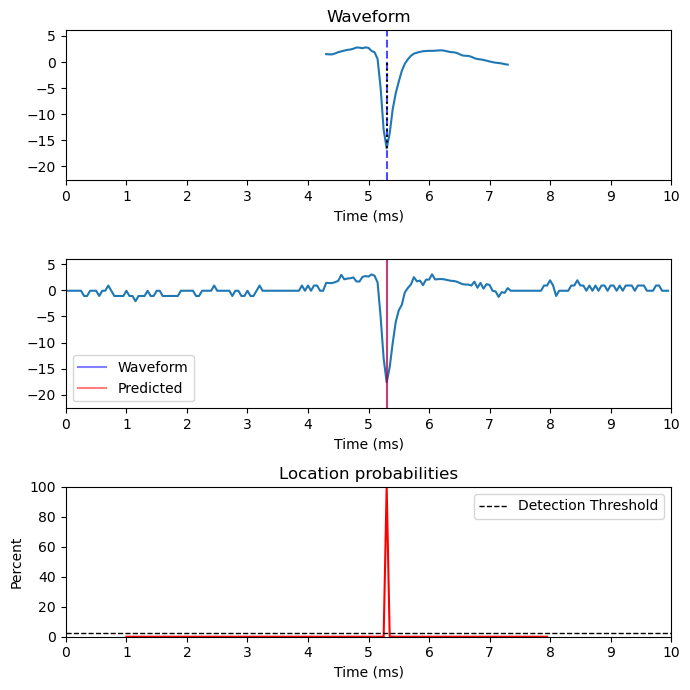

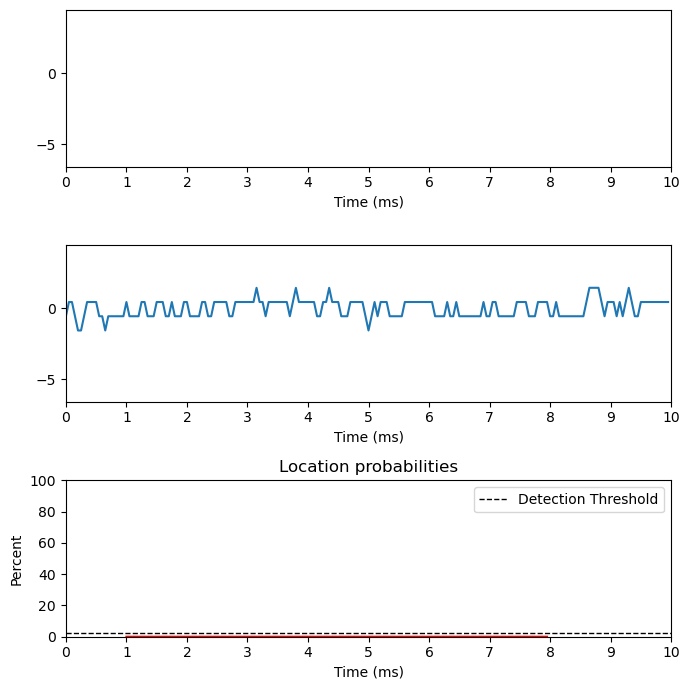

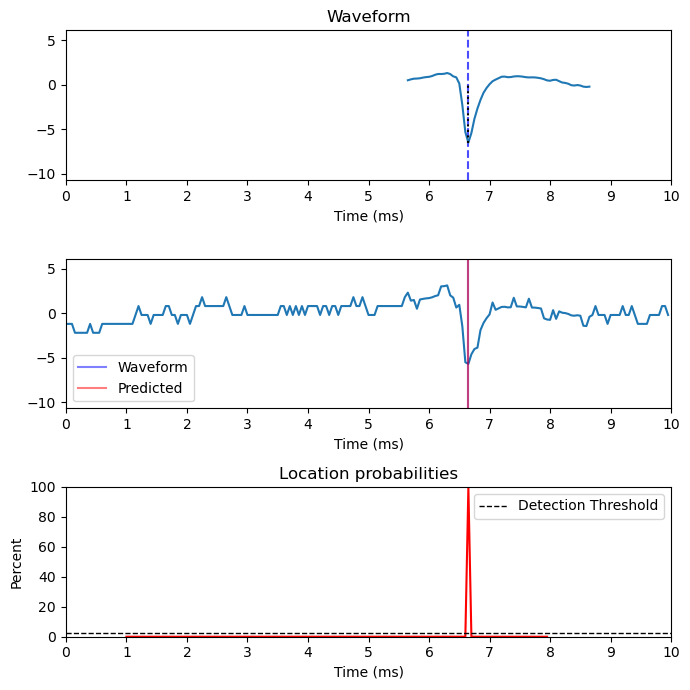

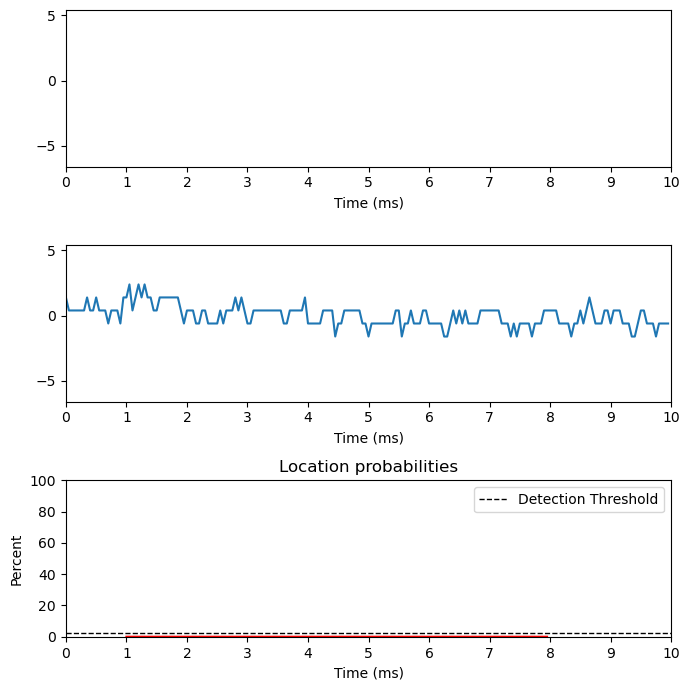

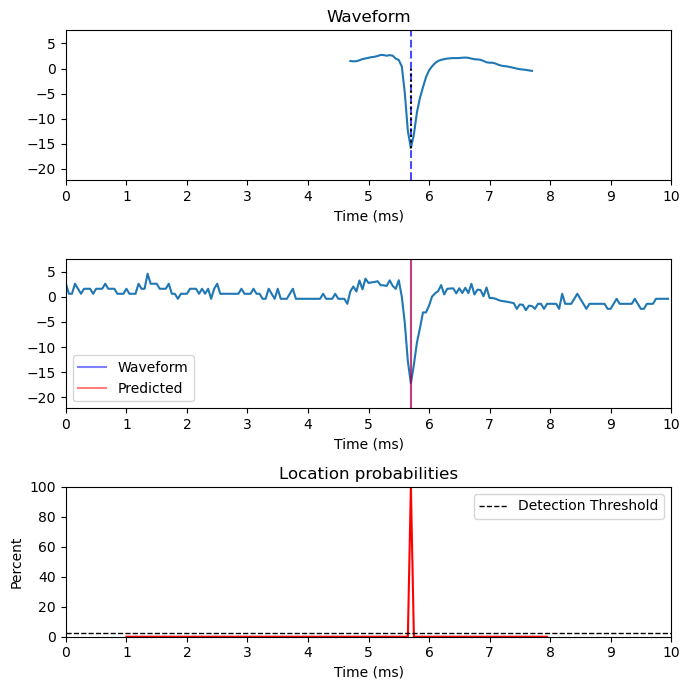

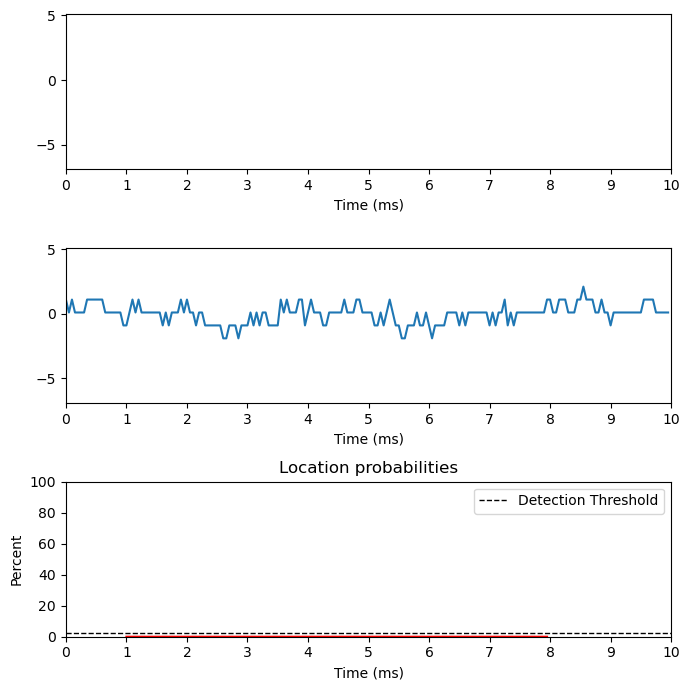

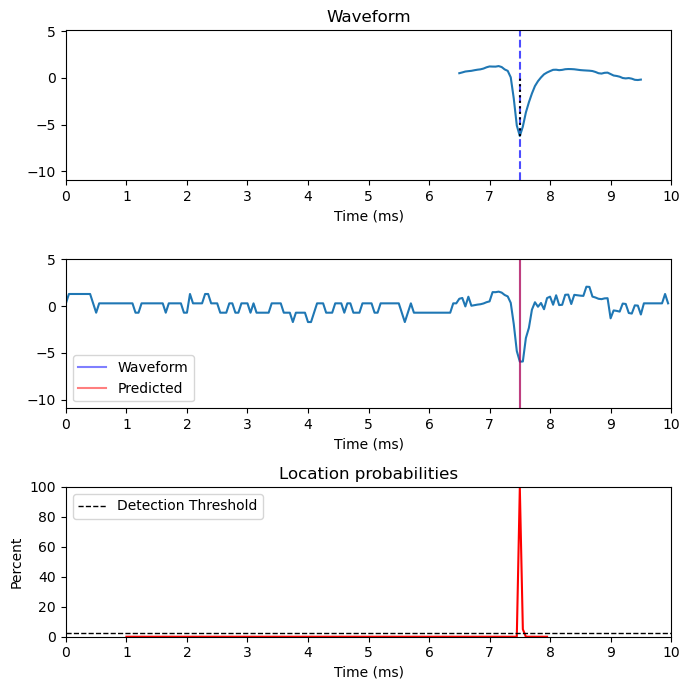

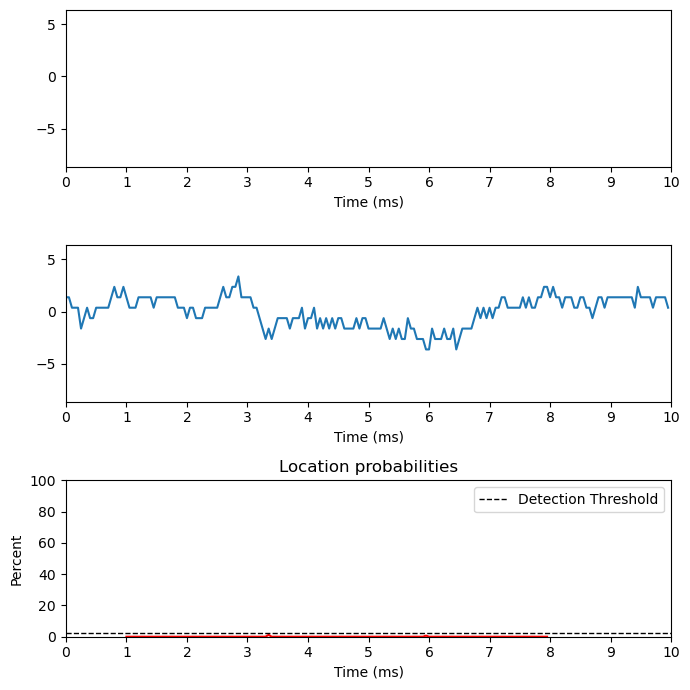

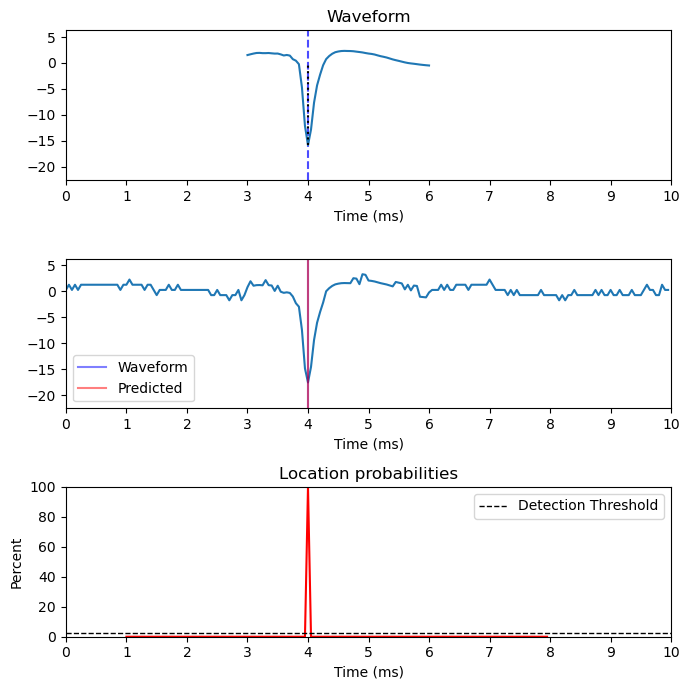

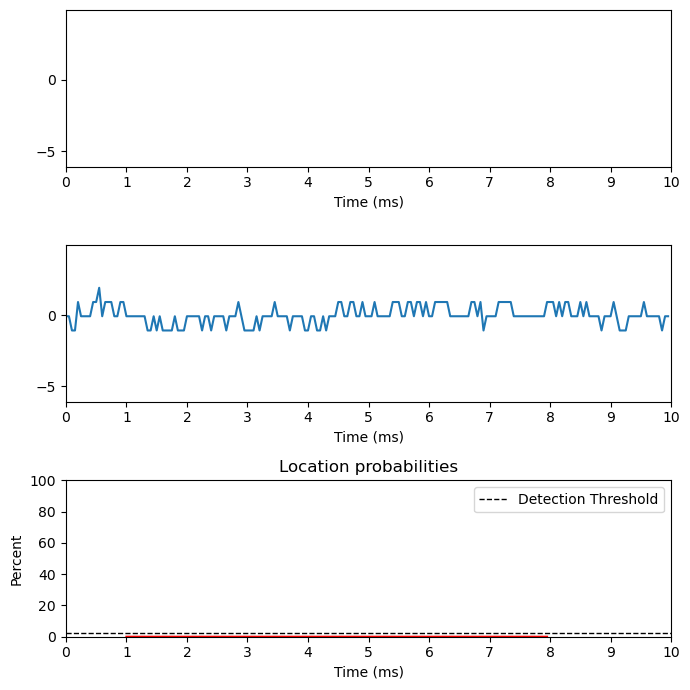

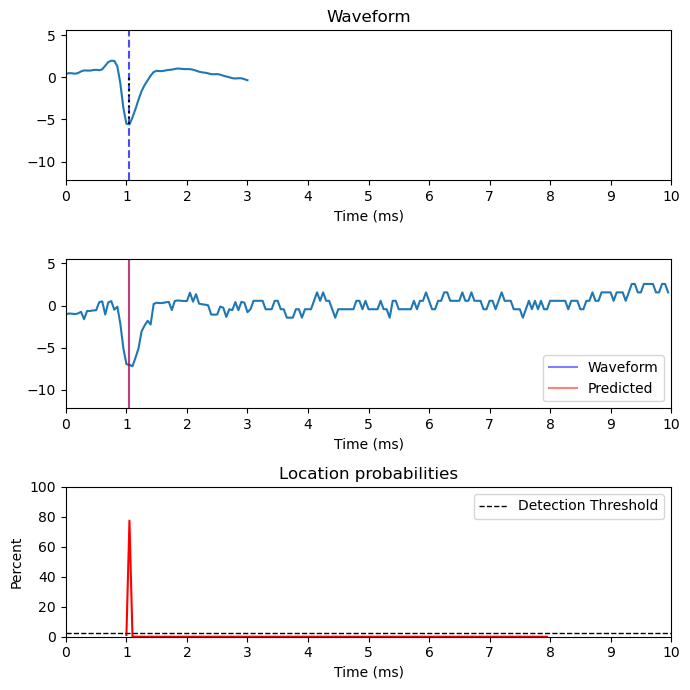

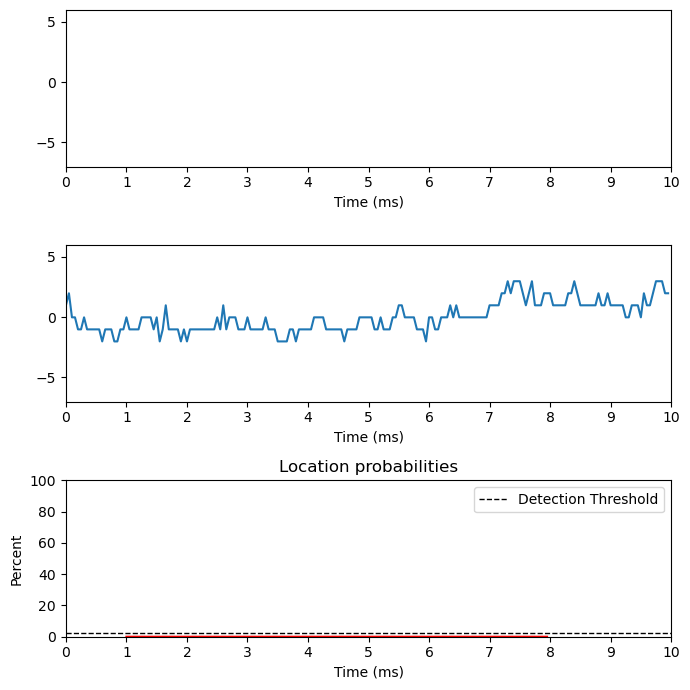

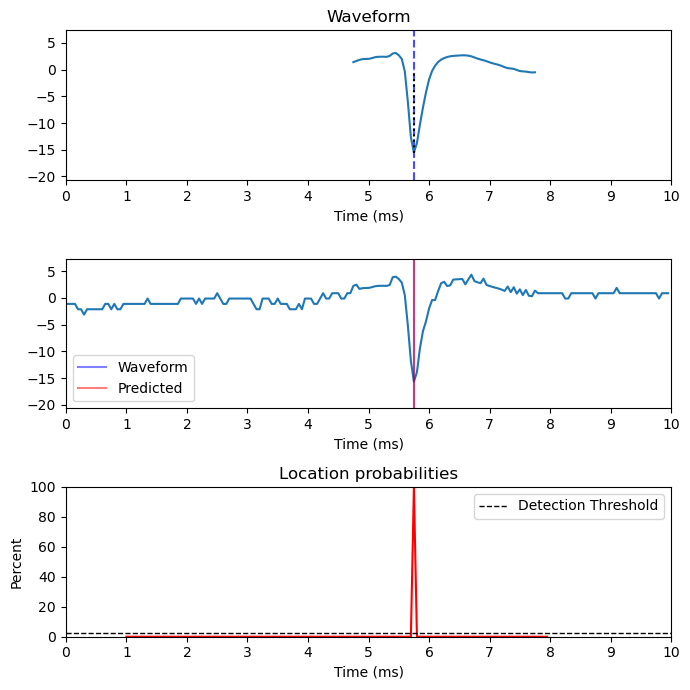

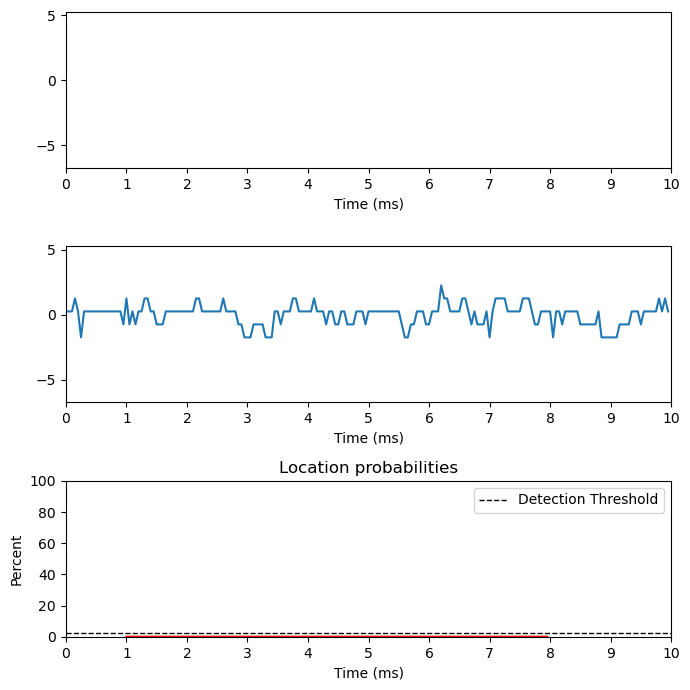

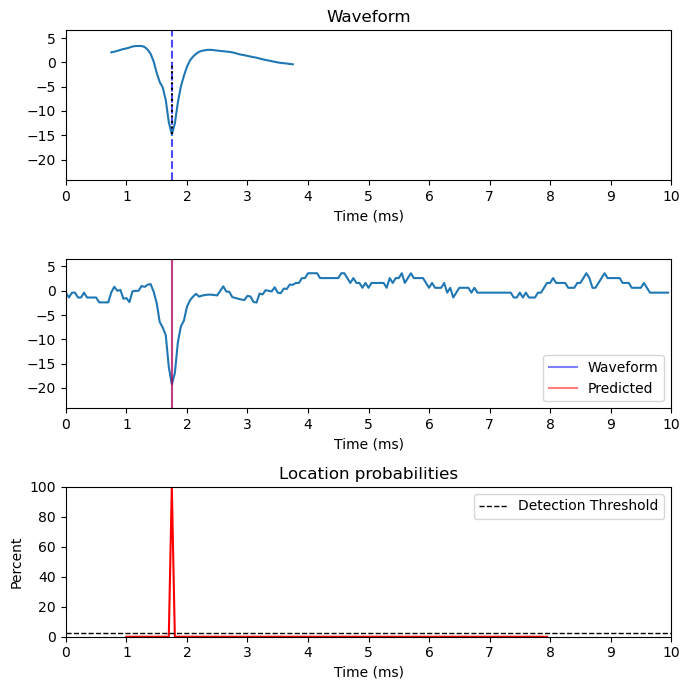

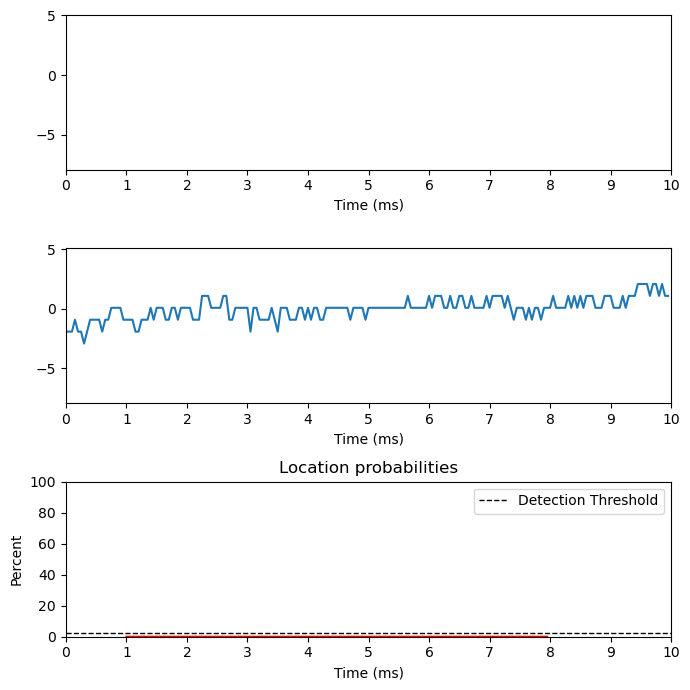

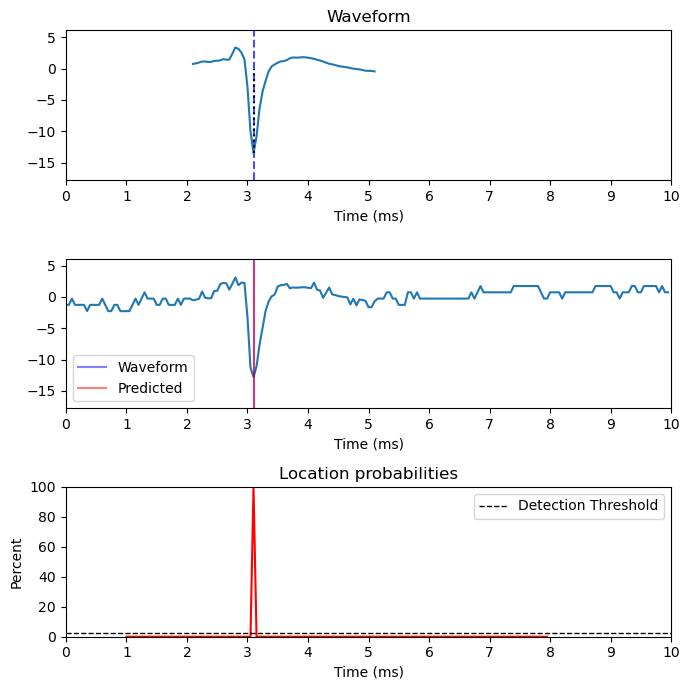

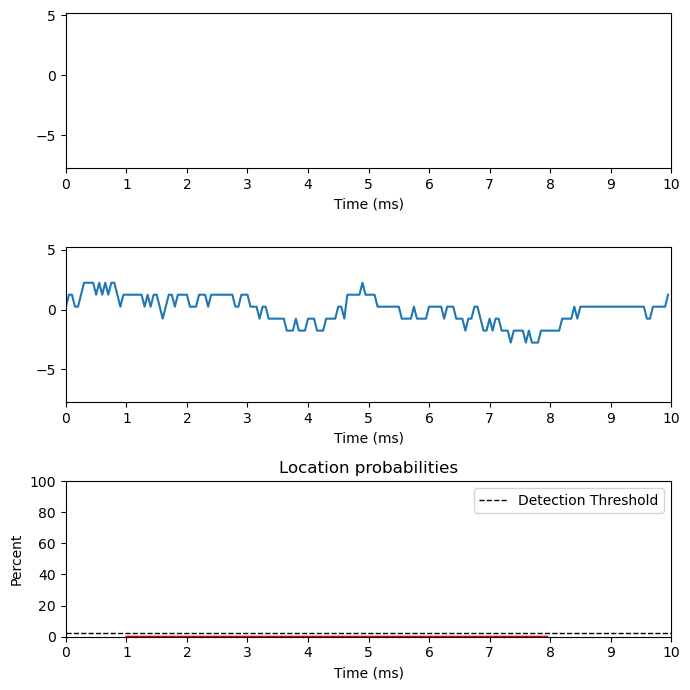

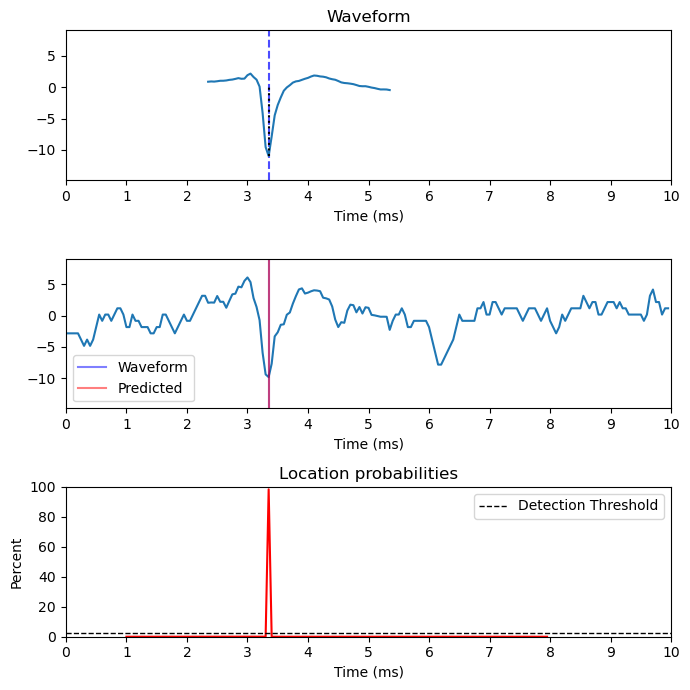

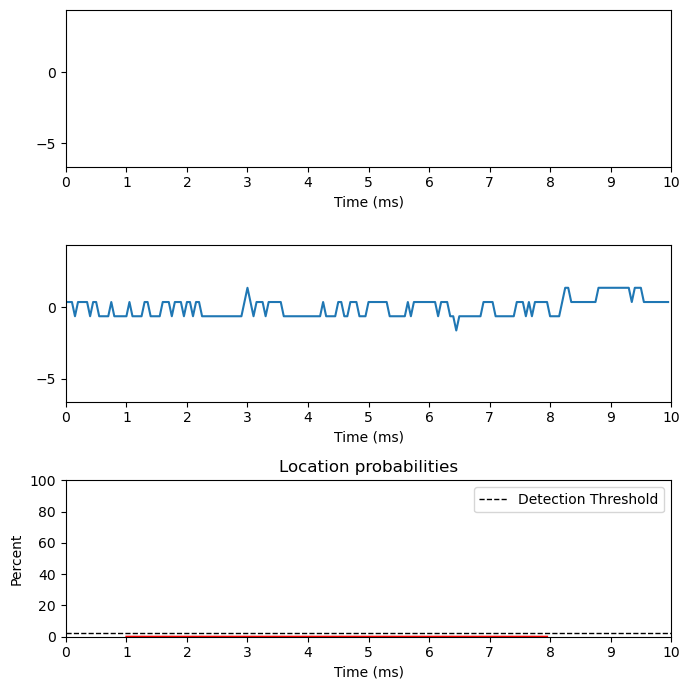

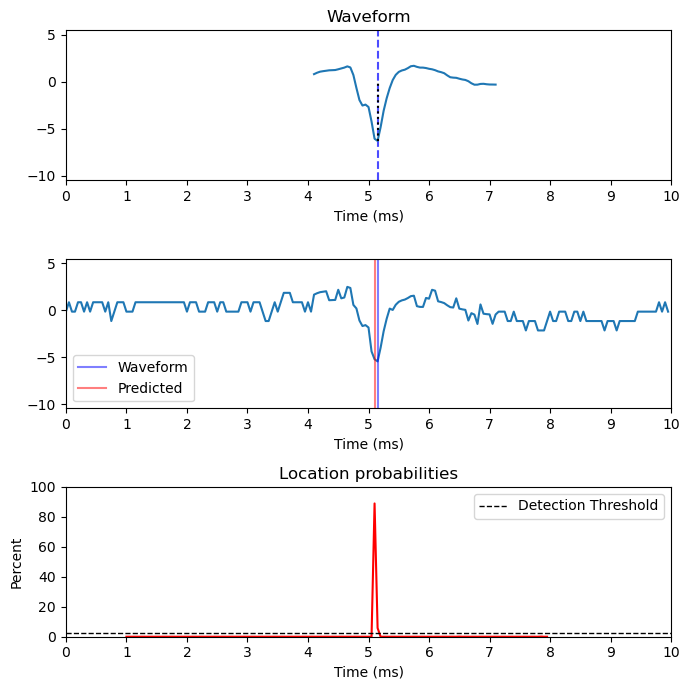

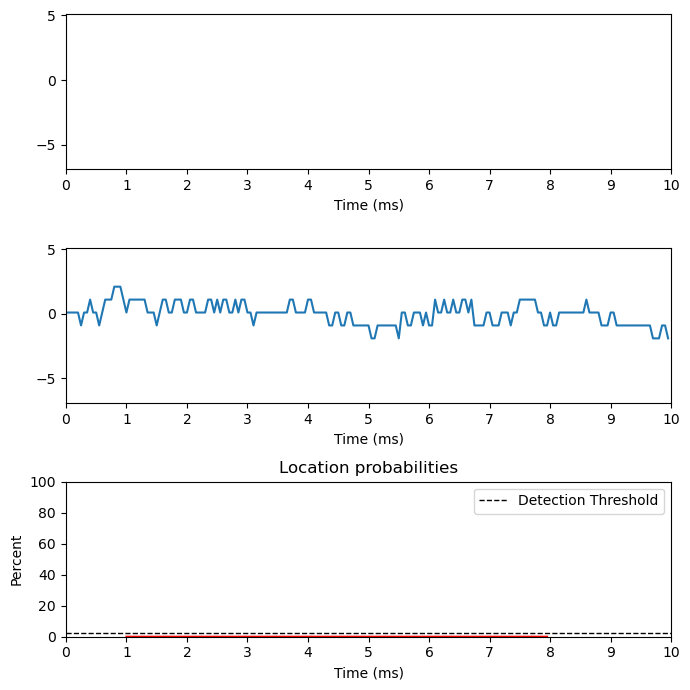

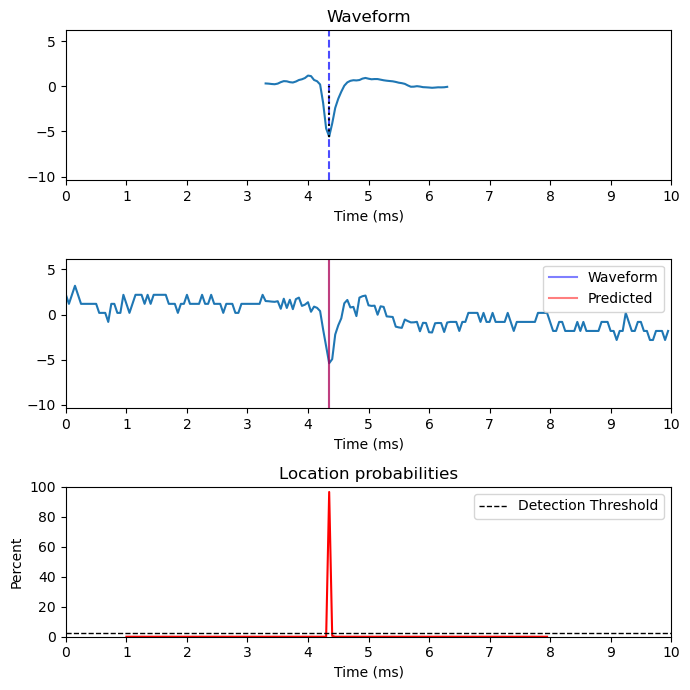

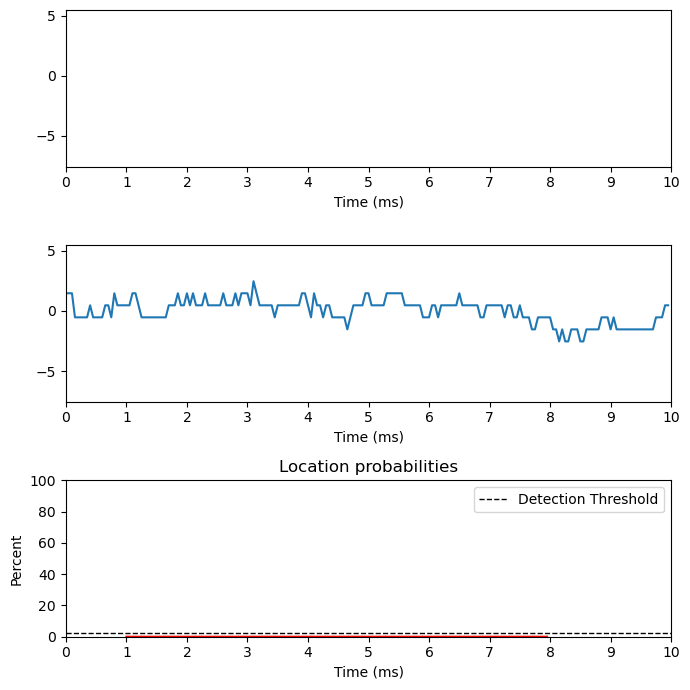

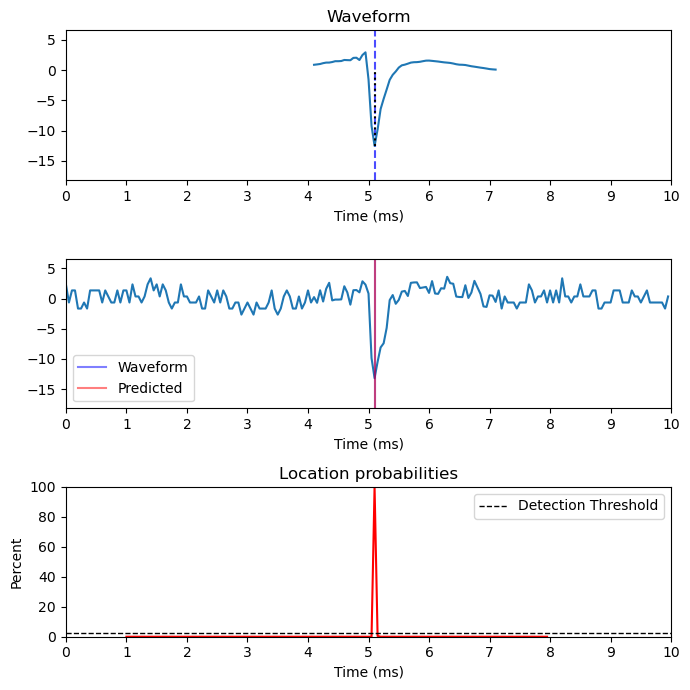

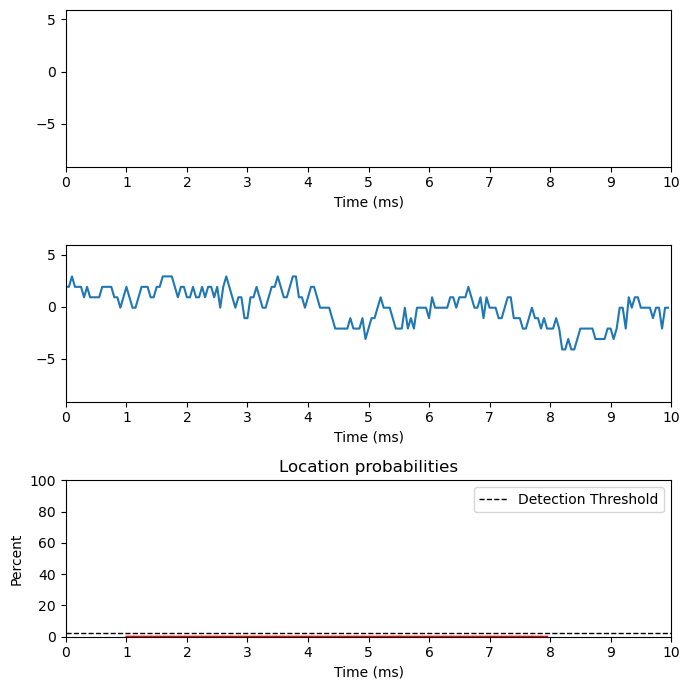

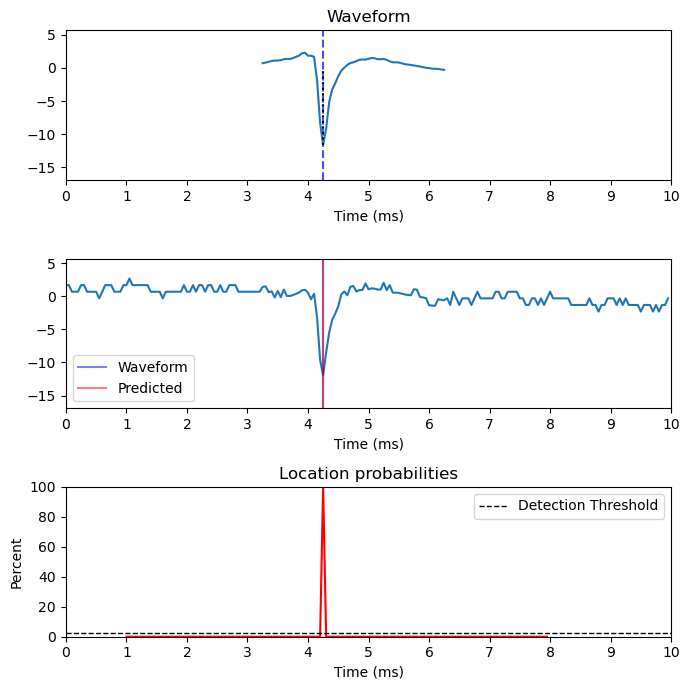

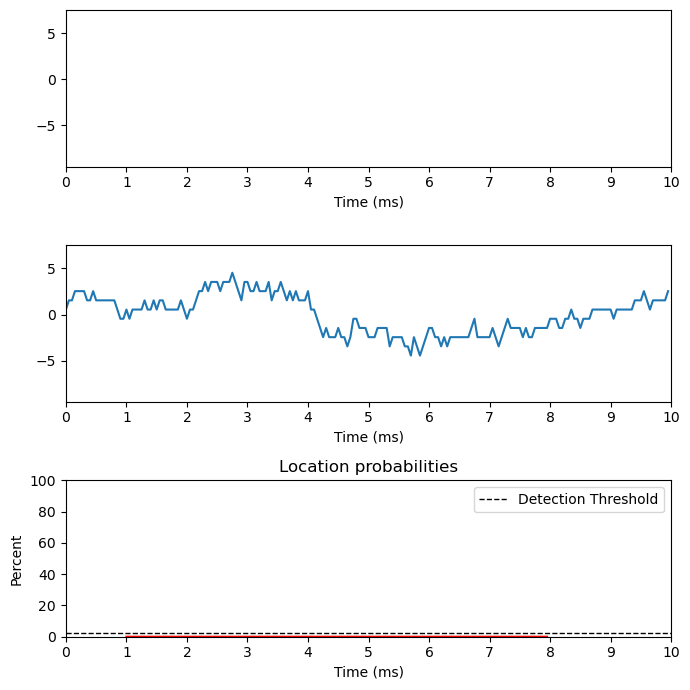

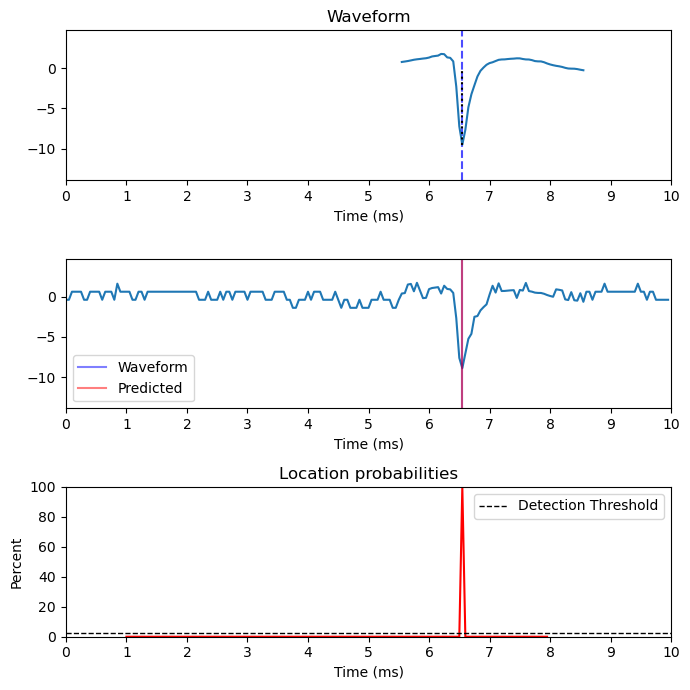

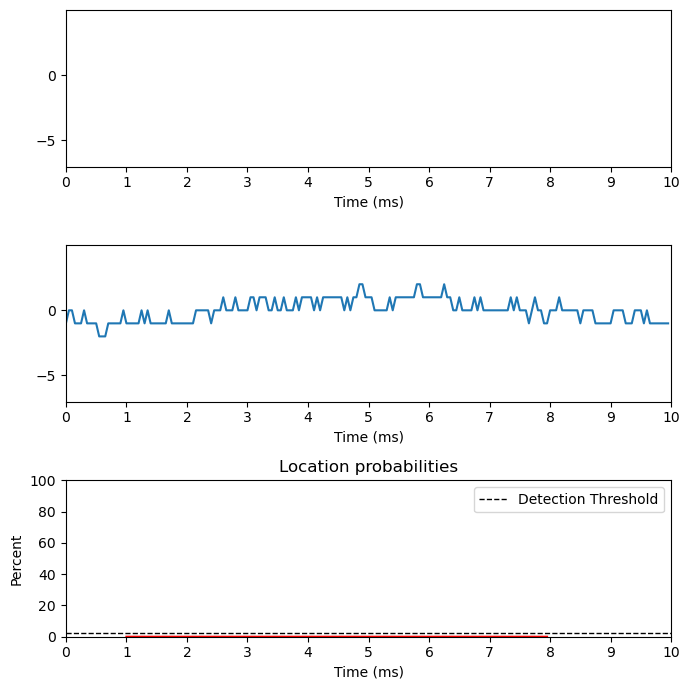

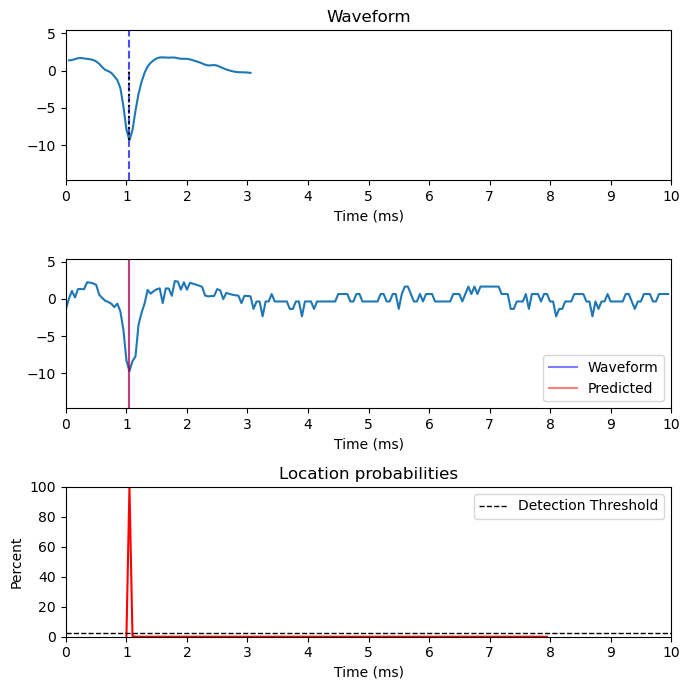

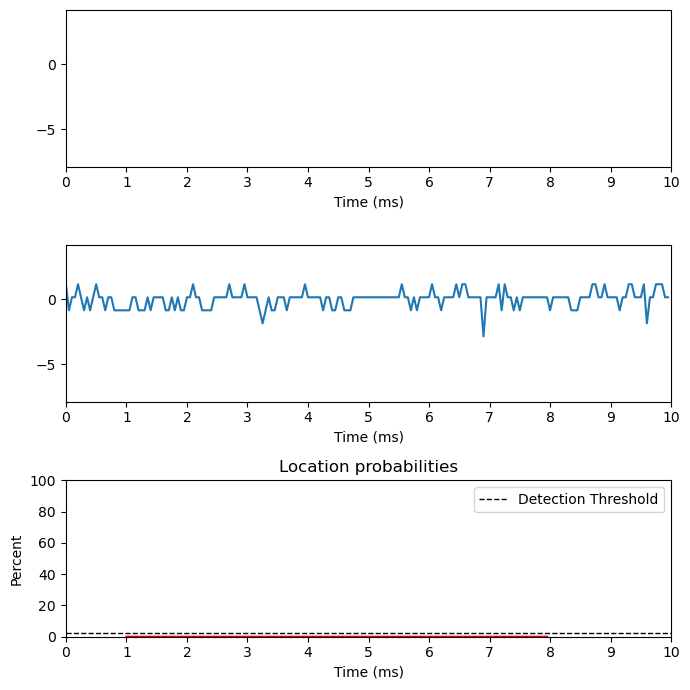

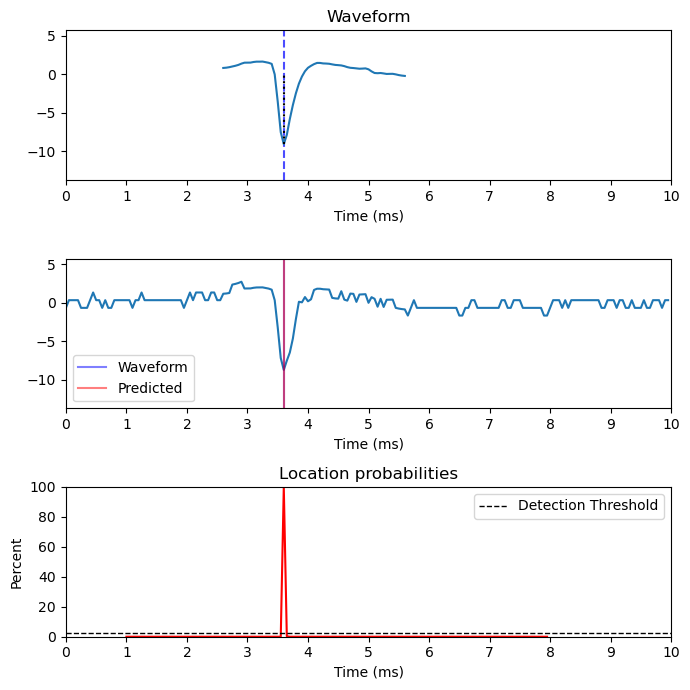

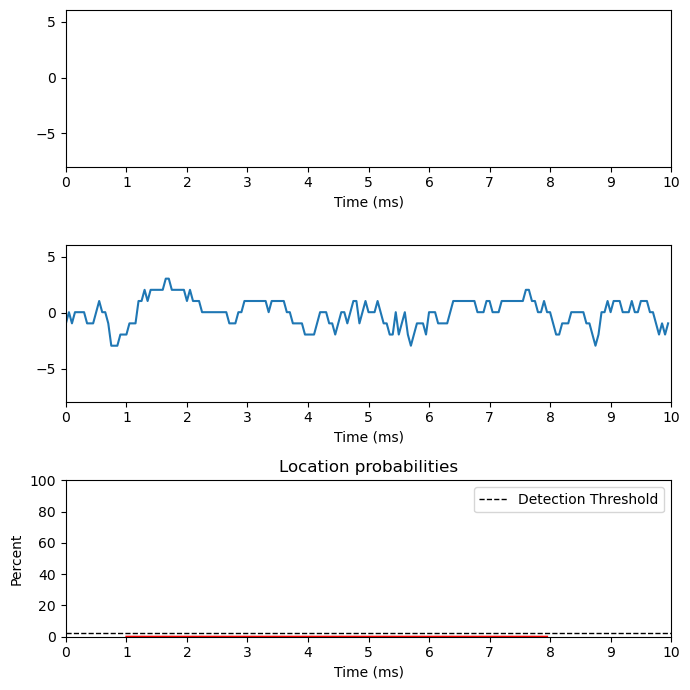

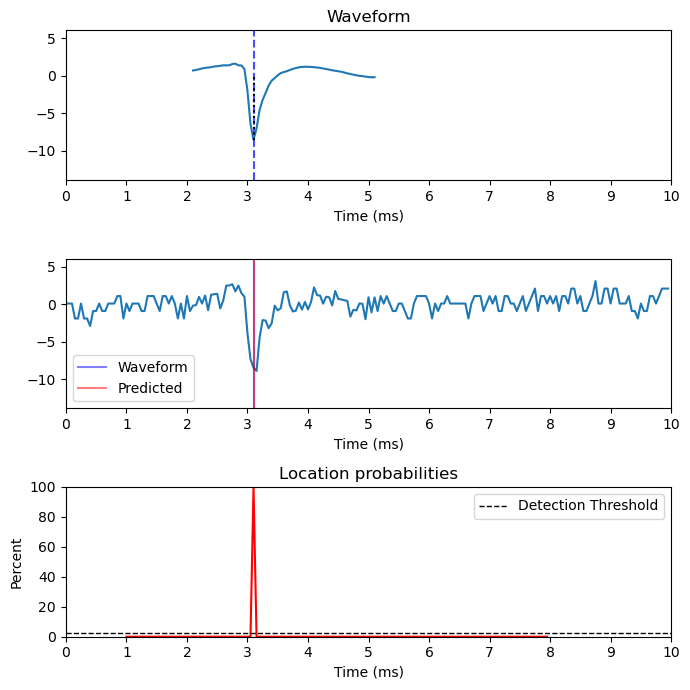

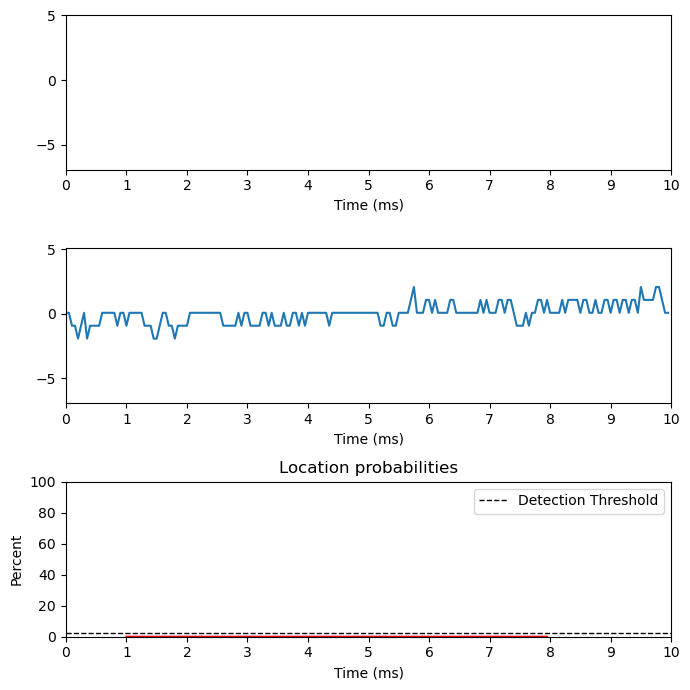

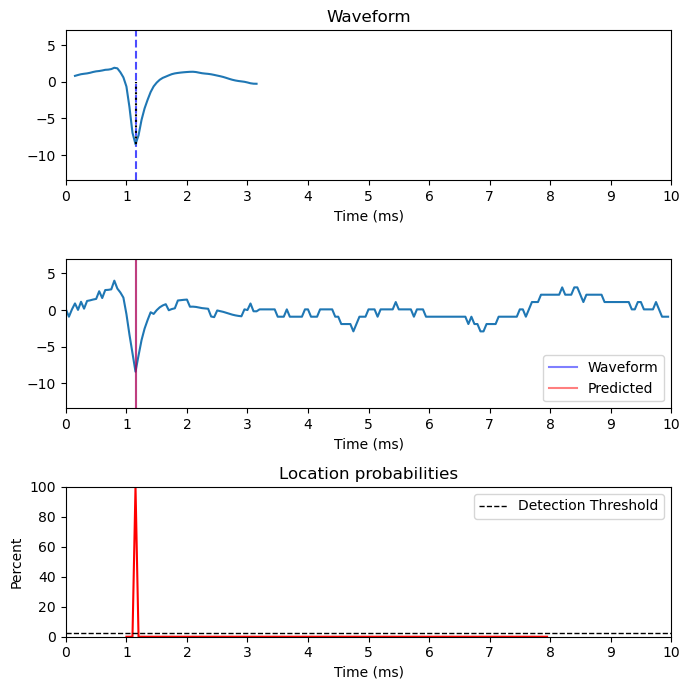

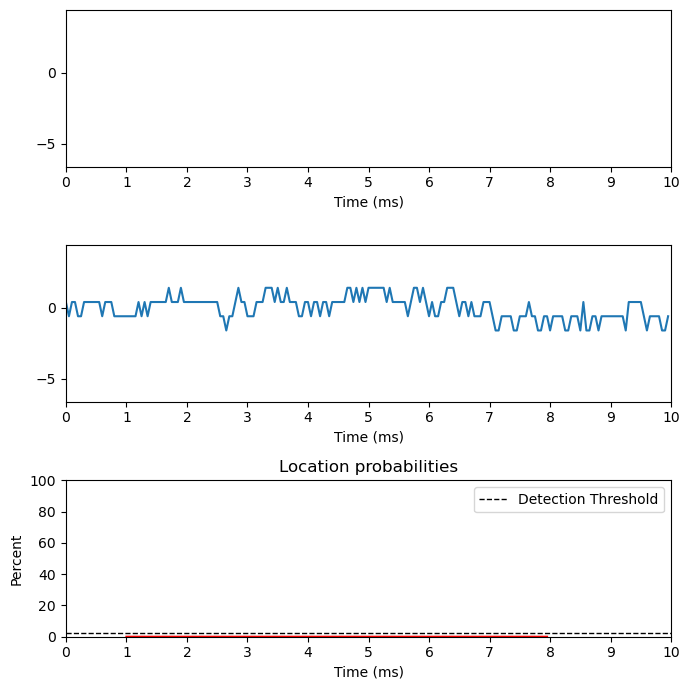

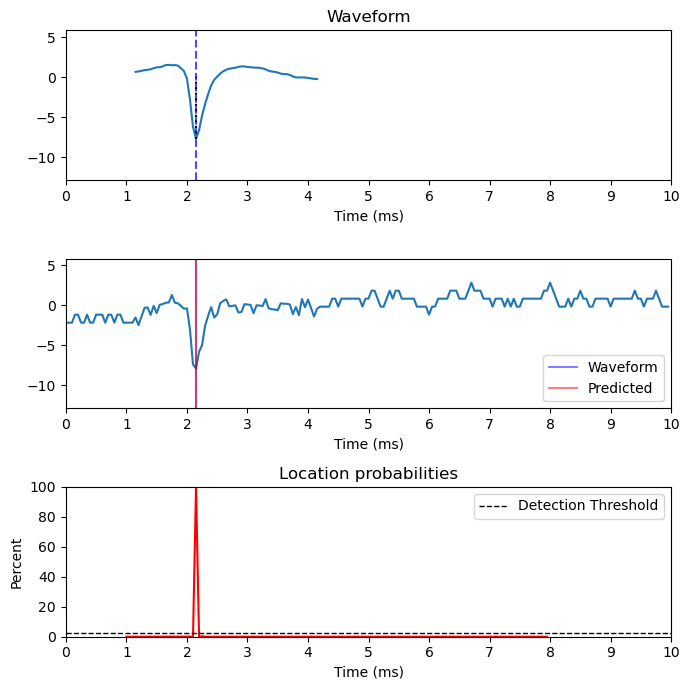

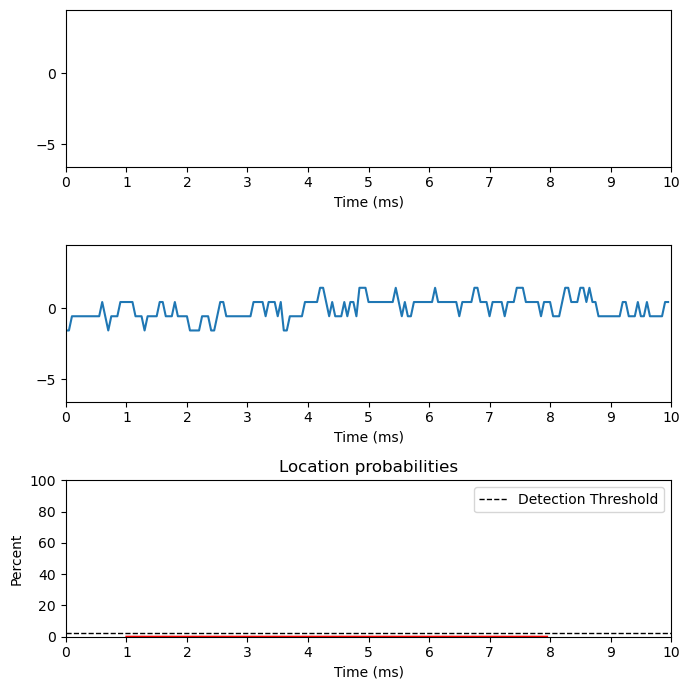

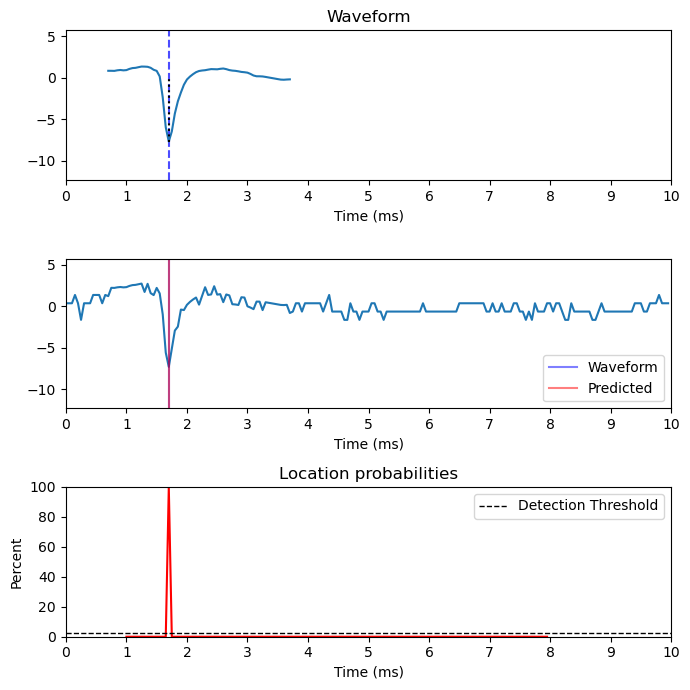

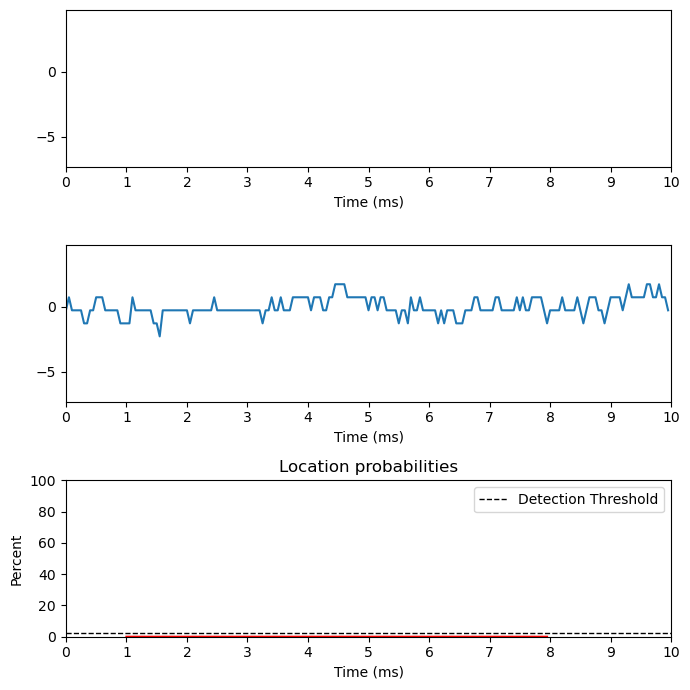

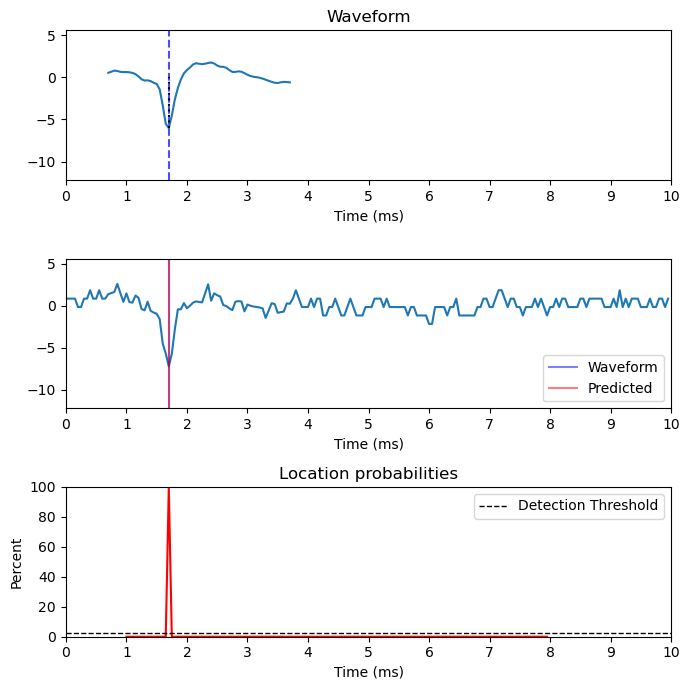

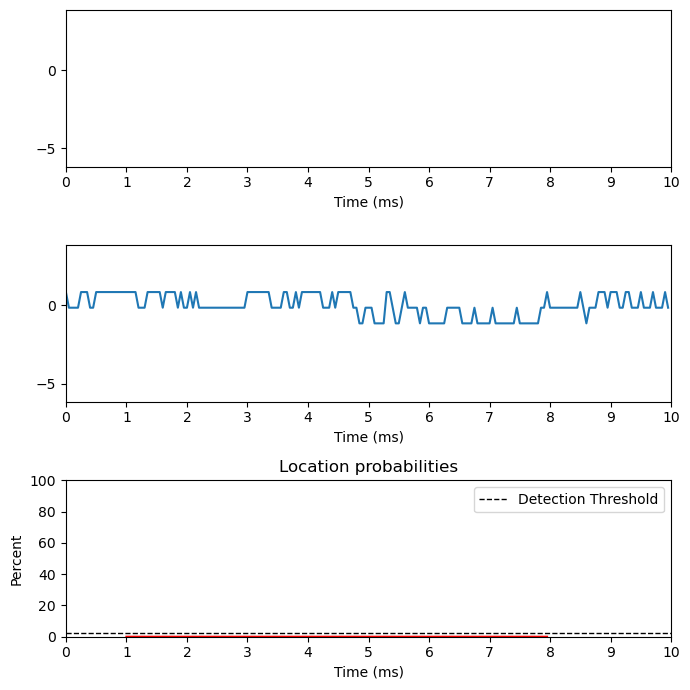

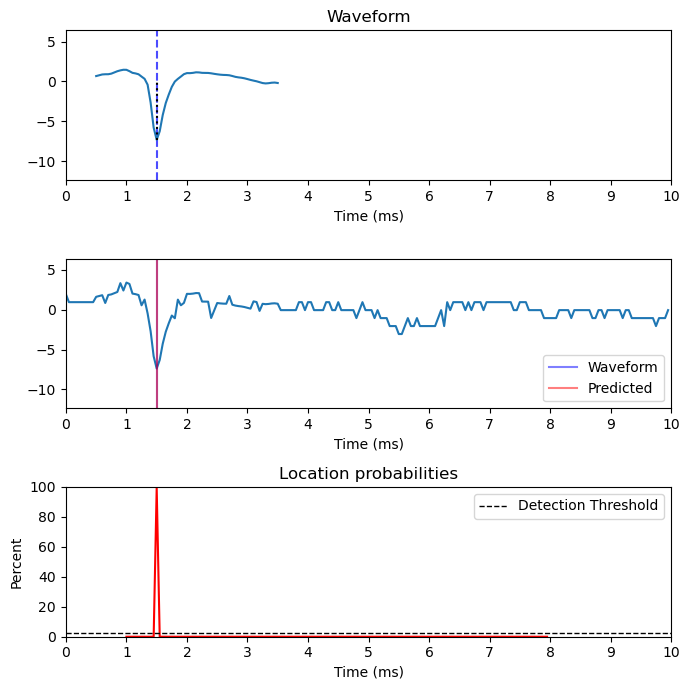

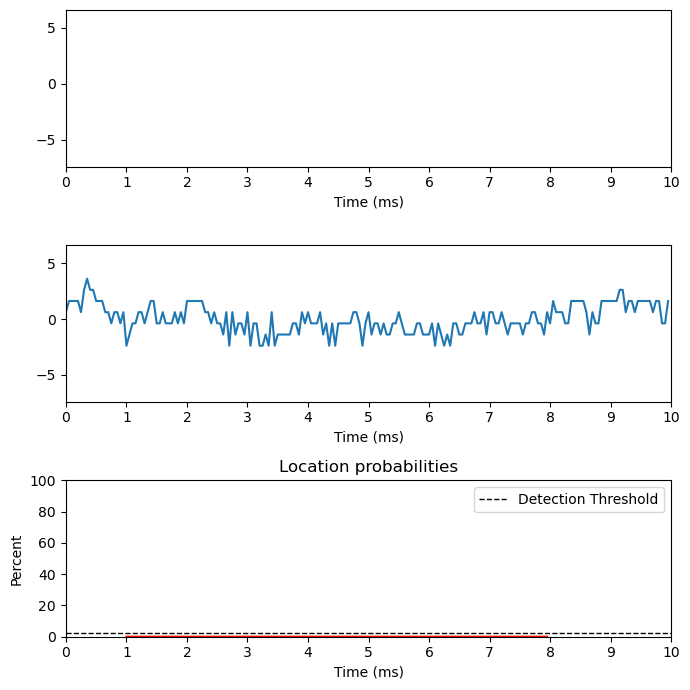

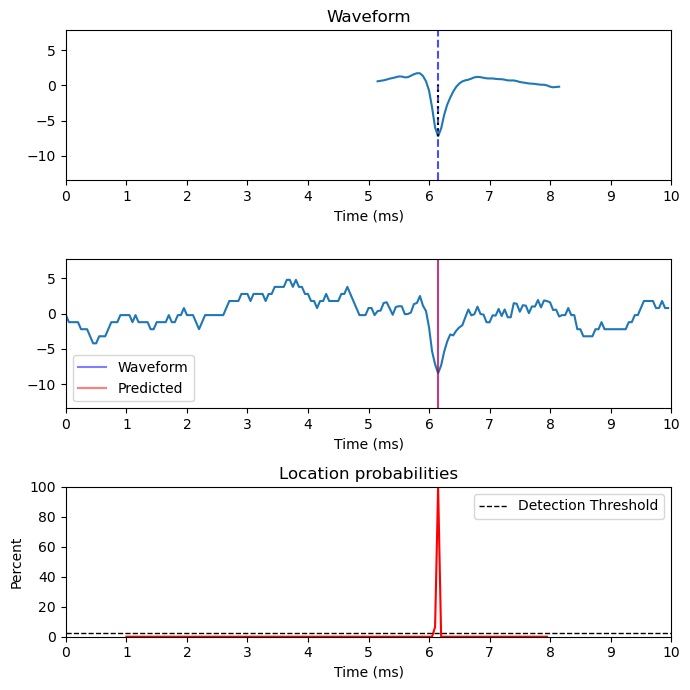

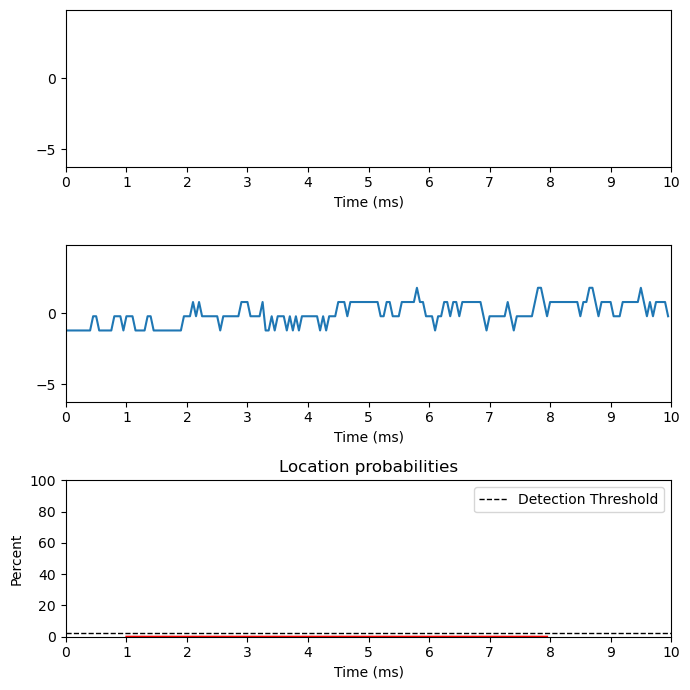

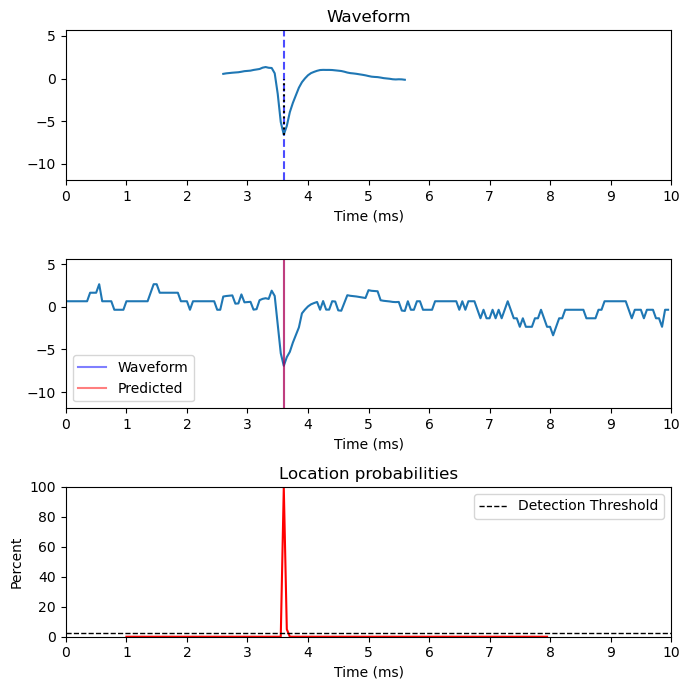

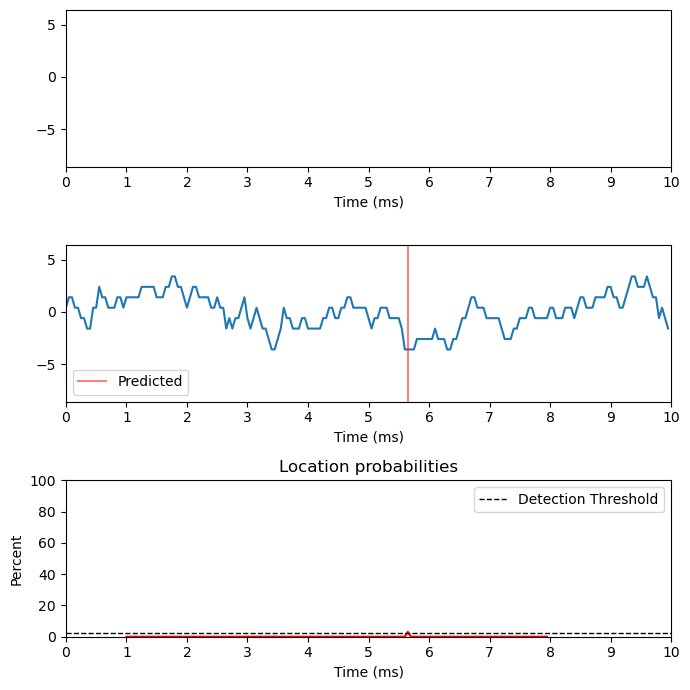

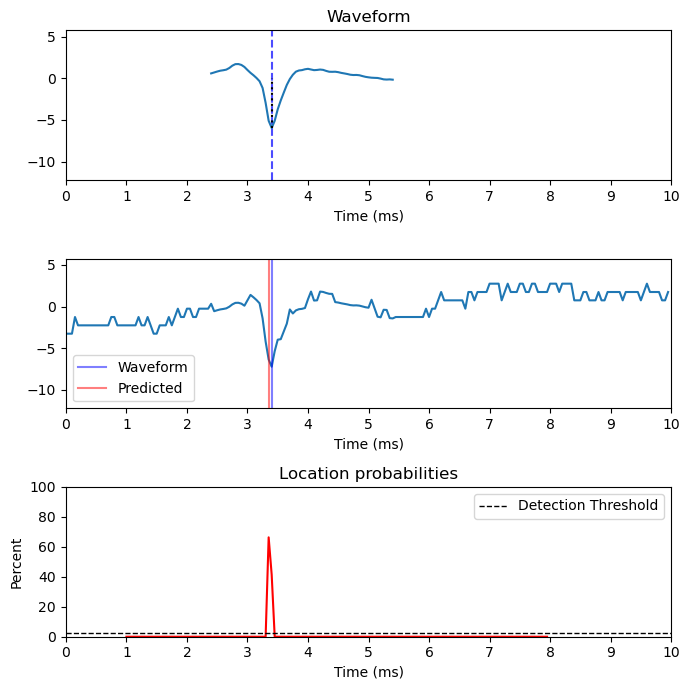

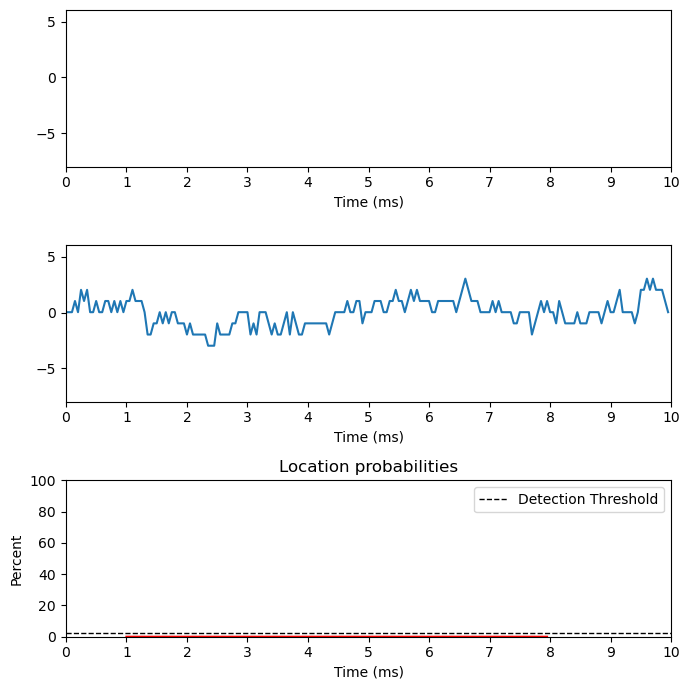

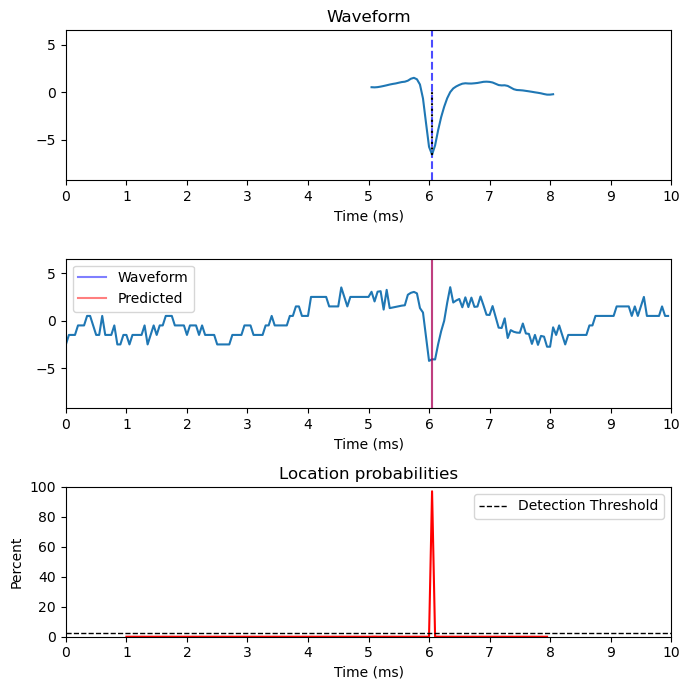

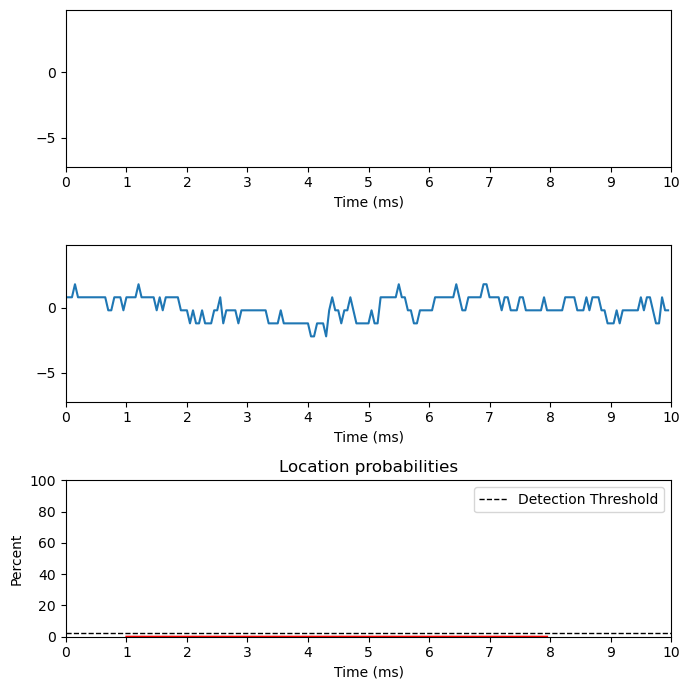

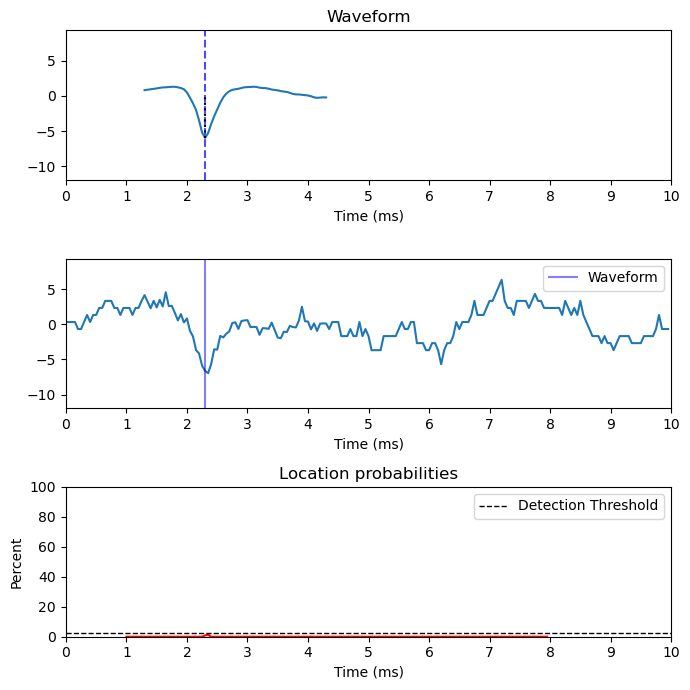

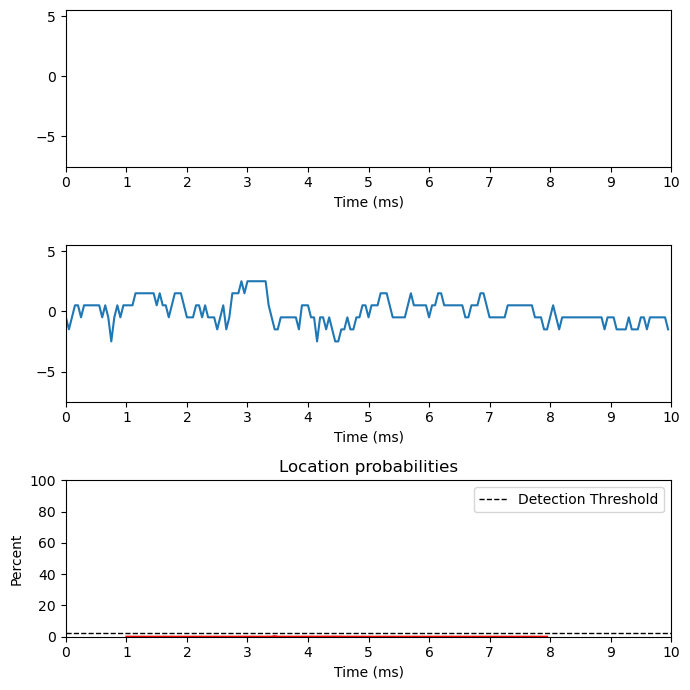

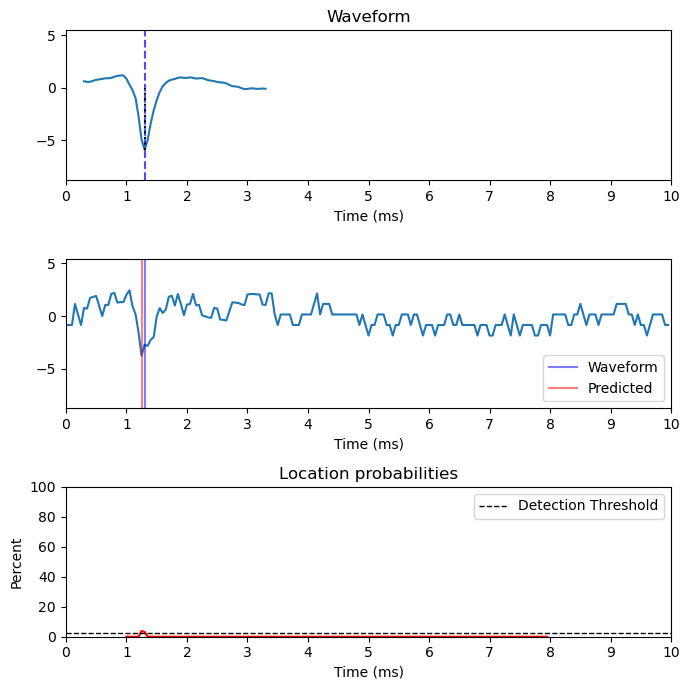

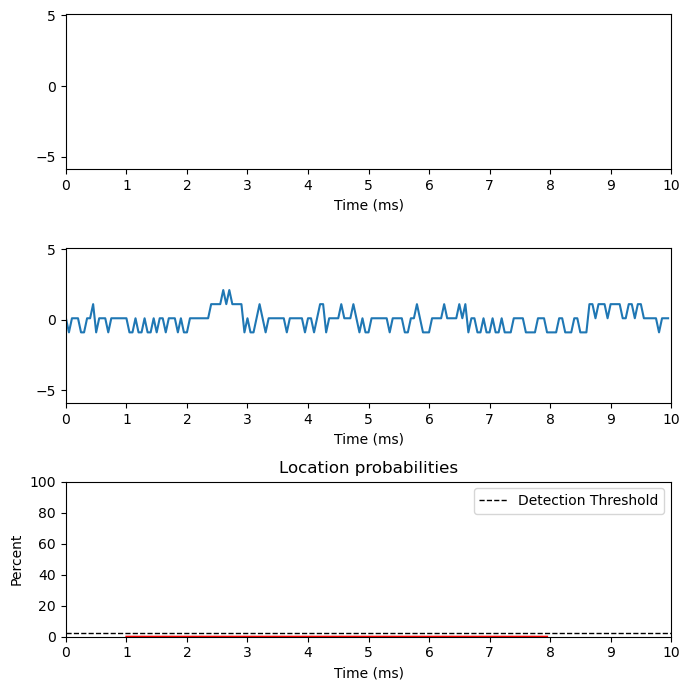

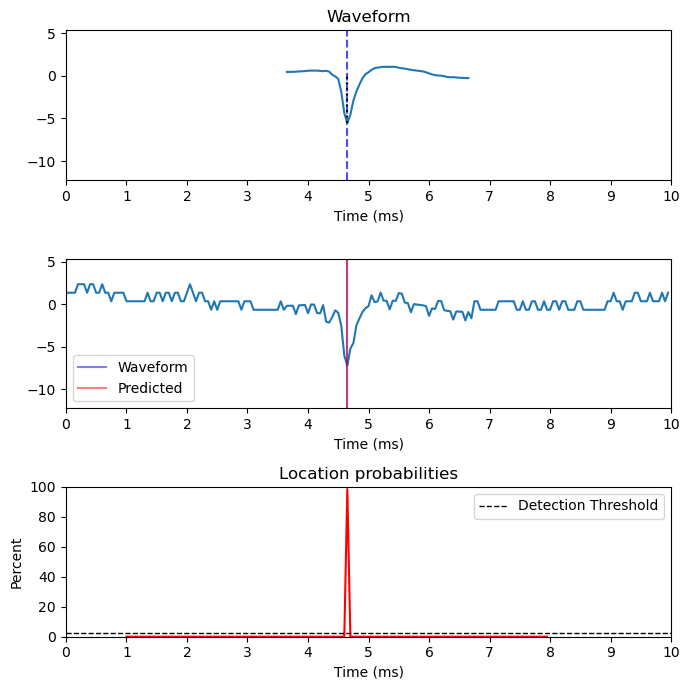

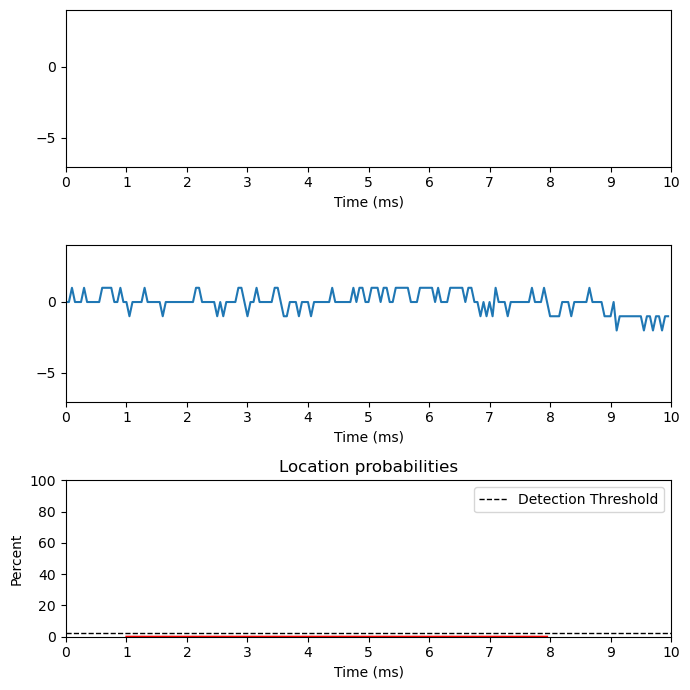

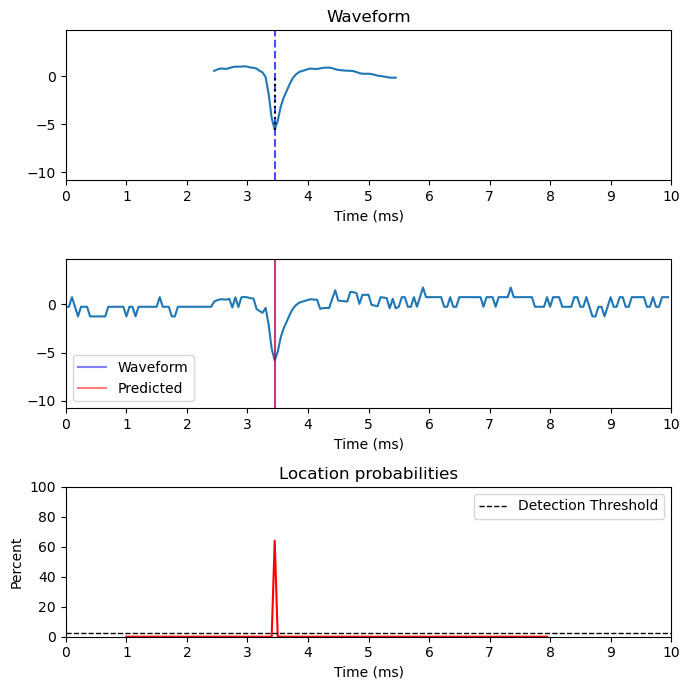

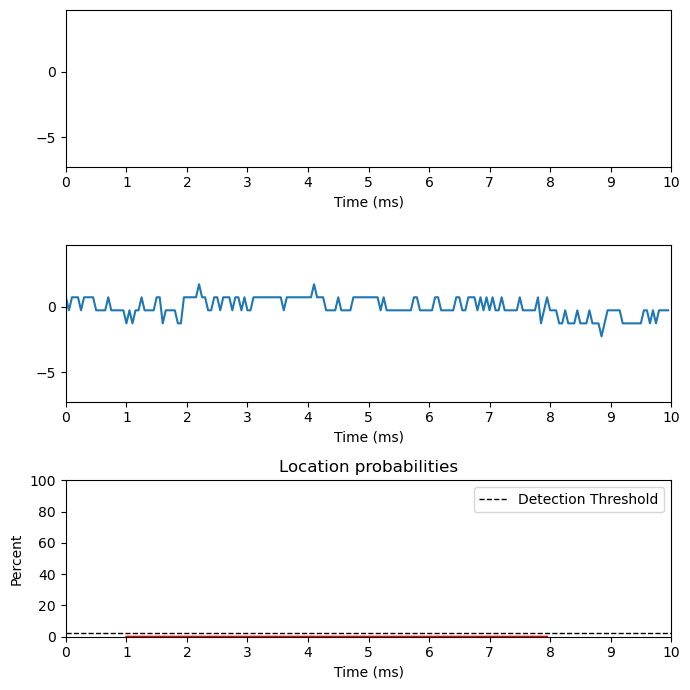

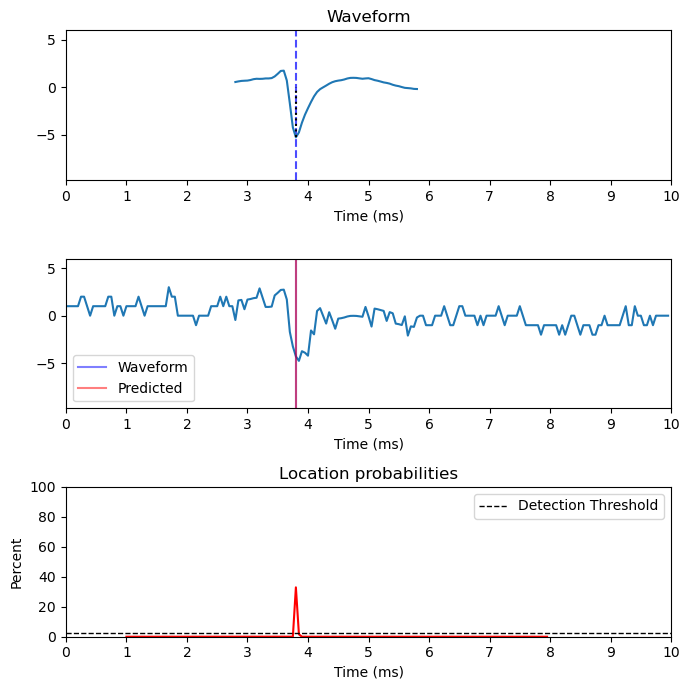

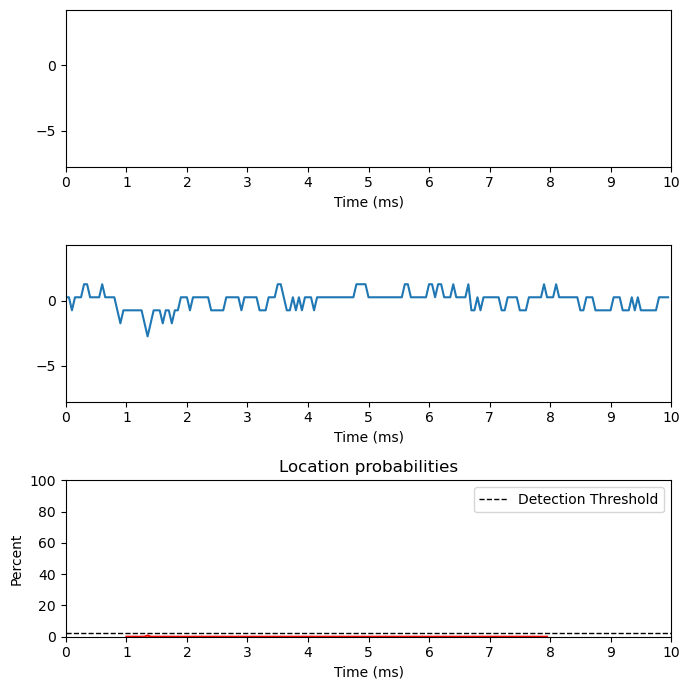

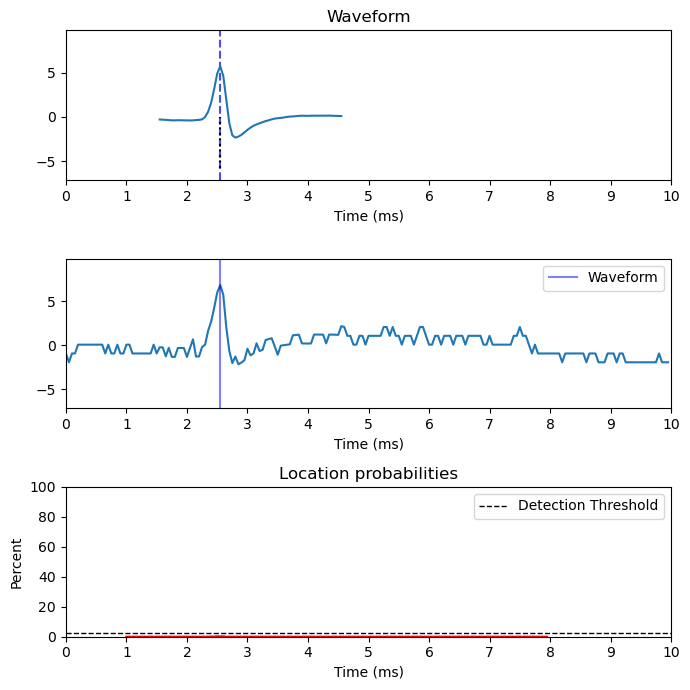

(0.353726557274982,
 97.29729729729729,
 99.97104247104247,
 94.5945945945946,
 97.22222222222223,
 95.89041095890413,
 0.11428571428571428,
 0.005714285714285714)

In [7]:
# Plot cases where model fails on validation data
model.perf(val, loc_buffer=10, plot_preds=("all",))